In [1]:
from scipy.interpolate import interp1d  # это чтобы нарисовать сглаженную кривую
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use('ggplot')

In [2]:
import urllib.request  # импортируем модуль
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# вообще значения параметров удобнее хранить в переменных и подставлять в шаблон запроса
req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-20601736&offset=18&count=150&v=5.92&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b') 

# да, так тоже можно, не обязательно делать это с with, как в примере выше
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')

In [3]:
print(result)

{"response":{"count":1538,"items":[{"id":366772,"from_id":-20601736,"owner_id":-20601736,"date":1552897932,"marked_as_ads":0,"post_type":"post","text":"Сегодня будет что-то интересное. 😏","copy_history":[{"id":112472,"owner_id":-31462139,"from_id":-31462139,"date":1552816803,"post_type":"post","text":"По всей видимости, эпизод «Шрамы» станет очень важным событием. В предстоящей серии «Ходячих мертвецов» мы узнаем, что происходило с Мишонн после потери Рика.\n\nКак думаете, что мы узнаем завтра?","attachments":[{"type":"photo","photo":{"id":456245982,"album_id":-7,"owner_id":-31462139,"user_id":100,"sizes":[{"type":"m","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40a7\/2z3koJlQmMY.jpg","width":130,"height":130},{"type":"o","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40ab\/sZi1_CY_AS8.jpg","width":130,"height":130},{"type":"p","url":"https:\/\/pp.userapi.com\/c855424\/v855424414\/40ac\/rvpYQEQrWl0.jpg","width":200,"height":200},{"type":"q","url":"https:\/\/pp.userapi.c

In [4]:
type(result)

str

In [5]:
import json
#data = requests.get(result).json()
data = json.loads(result) 
print(type(data))

<class 'dict'>


In [6]:
data['response']['items']

[{'id': 366772,
  'from_id': -20601736,
  'owner_id': -20601736,
  'date': 1552897932,
  'marked_as_ads': 0,
  'post_type': 'post',
  'text': 'Сегодня будет что-то интересное. 😏',
  'copy_history': [{'id': 112472,
    'owner_id': -31462139,
    'from_id': -31462139,
    'date': 1552816803,
    'post_type': 'post',
    'text': 'По всей видимости, эпизод «Шрамы» станет очень важным событием. В предстоящей серии «Ходячих мертвецов» мы узнаем, что происходило с Мишонн после потери Рика.\n\nКак думаете, что мы узнаем завтра?',
    'attachments': [{'type': 'photo',
      'photo': {'id': 456245982,
       'album_id': -7,
       'owner_id': -31462139,
       'user_id': 100,
       'sizes': [{'type': 'm',
         'url': 'https://pp.userapi.com/c855424/v855424414/40a7/2z3koJlQmMY.jpg',
         'width': 130,
         'height': 130},
        {'type': 'o',
         'url': 'https://pp.userapi.com/c855424/v855424414/40ab/sZi1_CY_AS8.jpg',
         'width': 130,
         'height': 130},
        {'ty

In [8]:
import re
i = 0
amounts = []
amounts2 = []
dictionary = {}
average = {}
replacement = {}
comparison = {}

lem = open('lem4.txt','w',encoding='utf-8-sig')

RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#texttt = re.compile('([^a-zA-Z])([^а-яёА-ЯЁ])([^-])', flags=re.UNICODE)

for word in str(data['response']['items'][i]):
    text3 = str(data['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')
    text3 = RE_EMOJI.sub('', text3)
    text33 = re.sub(' ','',text3)
    amounts2.append(len(text33))
    #text31 = re.sub(r'[^a-zA-Z0-9 ]', '', text3)
    #text32 = re.sub(r'[^a-zA-Z0-9 ]', '', text31)
    text2 = re.sub(r'—', ' ', str(text3))#.sub(r',', ' ', str(text3))#.sub('.',' ', text3).sub(',',' ', text3).sub('"',' ', text3).sub('(',' ', text3).sub(')',' ', text3).sub('[',' ', text3).sub(']',' ', text3)
    #text2 = re.sub(r'[^a-zA-Z0-9 ]', '', text33)
    #text2 = RE_EMOJI.sub(u'', text2)
    text2 = RE_EMOJI.sub('', text2)
    lst = text2.split()
    for w in lst:
        dictionary[str(w)]=len(w)
        replacement[str(w)]=len(w)
    text = str(data['response']['items'][i]['text'])
    #if text != '':
    #    x, y = np.ogrid[:300, :300]
    #    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    #    mask = 255 * mask.astype(int) 
    #    wc = WordCloud(background_color="white", repeat=True, mask=mask)
    #    wc.generate(text)
    #    plt.axis("off")
    #    plt.imshow(wc, interpolation="bilinear")
    #    plt.show()
    
    print(data['response']['items'][i]['text'])
    print('Число букв ' + str(len(text33)))
    print('Число слов ' + str(len(lst)))
    if len(text33) != 0 or len(lst) != 0:
        print('Средняя длина слова ' + str(len(text33)//len(lst)))
        average[str(i)]=str(len(text33)//len(lst))
    print(' ')
    print(' ')
    print(' ')
    amounts.append(lst)
    #comparison[]
    #if len(text3) != 0 or len(lst) !=0
    #if int(max(replacement_nums)) != ():
    #    # отсортируем данные по названиям городов
    #    replacement_nums = [c[1] for c in sorted(replacement.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
    #    replacement_labs = sorted([w for rep in replacement]) # подписи по оси x
    #    x = range(len(replacement_labs)) # данные по оси x
    #    # задаем палитру (цвета ничего не будут значить)
    #    colors = sns.color_palette('Blues', int(max(replacement_nums)))
    #    f = interp1d(x, [int(x)+0.5 for x in replacement_nums], fill_value='extrapolate')
    #    x_new = np.linspace(0, 7, 12) # тут нужны min и max по оси x
    #    y_smooth = f(x_new)
    #    plt.figure(figsize=(20, 10), dpi=200)
    #    plt.bar(x, replacement_nums, color=colors)
    #    plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')
        # рисуем точки максимумов (условных)
    #    for a, b in zip(x, replacement_nums):
    #        if int(b) > 5:
    #            plt.scatter(a, int(b)+1.5, s=0)
    #            plt.text(a-0.3, int(b)+1.5, str(b))
    #    plt.title('\nСлова в предложении\n',  fontsize=20)
    #    plt.ylabel('Количество букв\n',  fontsize=16)
    #    plt.xlabel('\nСлово',  fontsize=18)
    #    plt.xticks(x, replacement_labs, rotation=90)
    #    plt.show()
    
    #replacement.clear()
    
    #print(len(lst2)/len(lst))
    
    lem.write(re.sub('[^а-яёА-ЯЁ ]',' ',text3))
    
    i += 1
    if i == 149:
        break
print(amounts)
total = 0
for lst in amounts:
    print(len(lst))
    total += len(lst)
print('Общее число слов в предложении ' + str(total))
print('Общее число символов в предложении ' + str(sum(amounts2)))
print('Средняя длина слова ' + str(sum(amounts2)//total))


#print(dictionary)
sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

sorted(average.items(), key=lambda x: x[1], reverse=True)
#print(data['response']['items'][0]['text'])
#print(data['response']['items'][1]['text'])
#print(data['response']['items'][2]['text'])
#print(data['response']['items'][3]['text'])

Сегодня будет что-то интересное. 😏
Число букв 28
Число слов 4
Средняя длина слова 7
 
 
 
Давайте обсудим 13 серию «Ходячих мертвецов» по-настоящему, со спойлерами. Пишите все мысли, появившиеся после просмотра. 

🔥ОСТОРОЖНО, В КОММЕНТАРИЯХ ВОЗМОЖНЫ СПОЙЛЕРЫ!🔥

Если вы пропустили новый эпизод, настоятельно рекомендуем не заглядывать в комментарии и посмотреть повтор в воскресенье ночью на FOX.
Число букв 259
Число слов 39
Средняя длина слова 6
 
 
 
Она хочет только одного!

Смотрите новую серию «Ходячих мертвецов» сегодня в 19:00 МСК на FOX.
Число букв 78
Число слов 15
Средняя длина слова 5
 
 
 
Вдохновение, которого нам не хватало в этот Международный женский день. 😎
Число букв 60
Число слов 10
Средняя длина слова 6
 
 
 
Прекрасные дамы, поздравляем вас с праздником 8 марта! 🌷

Как замечательно, что вы все такие разные: сильные, как Мишон, смелые, как Джудит, непоколебимые, как Кэрол, нежные и заботливые, как Лорен. И как прекрасно, что мужчины готовы на все ради вас!
Число букв 19

IndexError: list index out of range

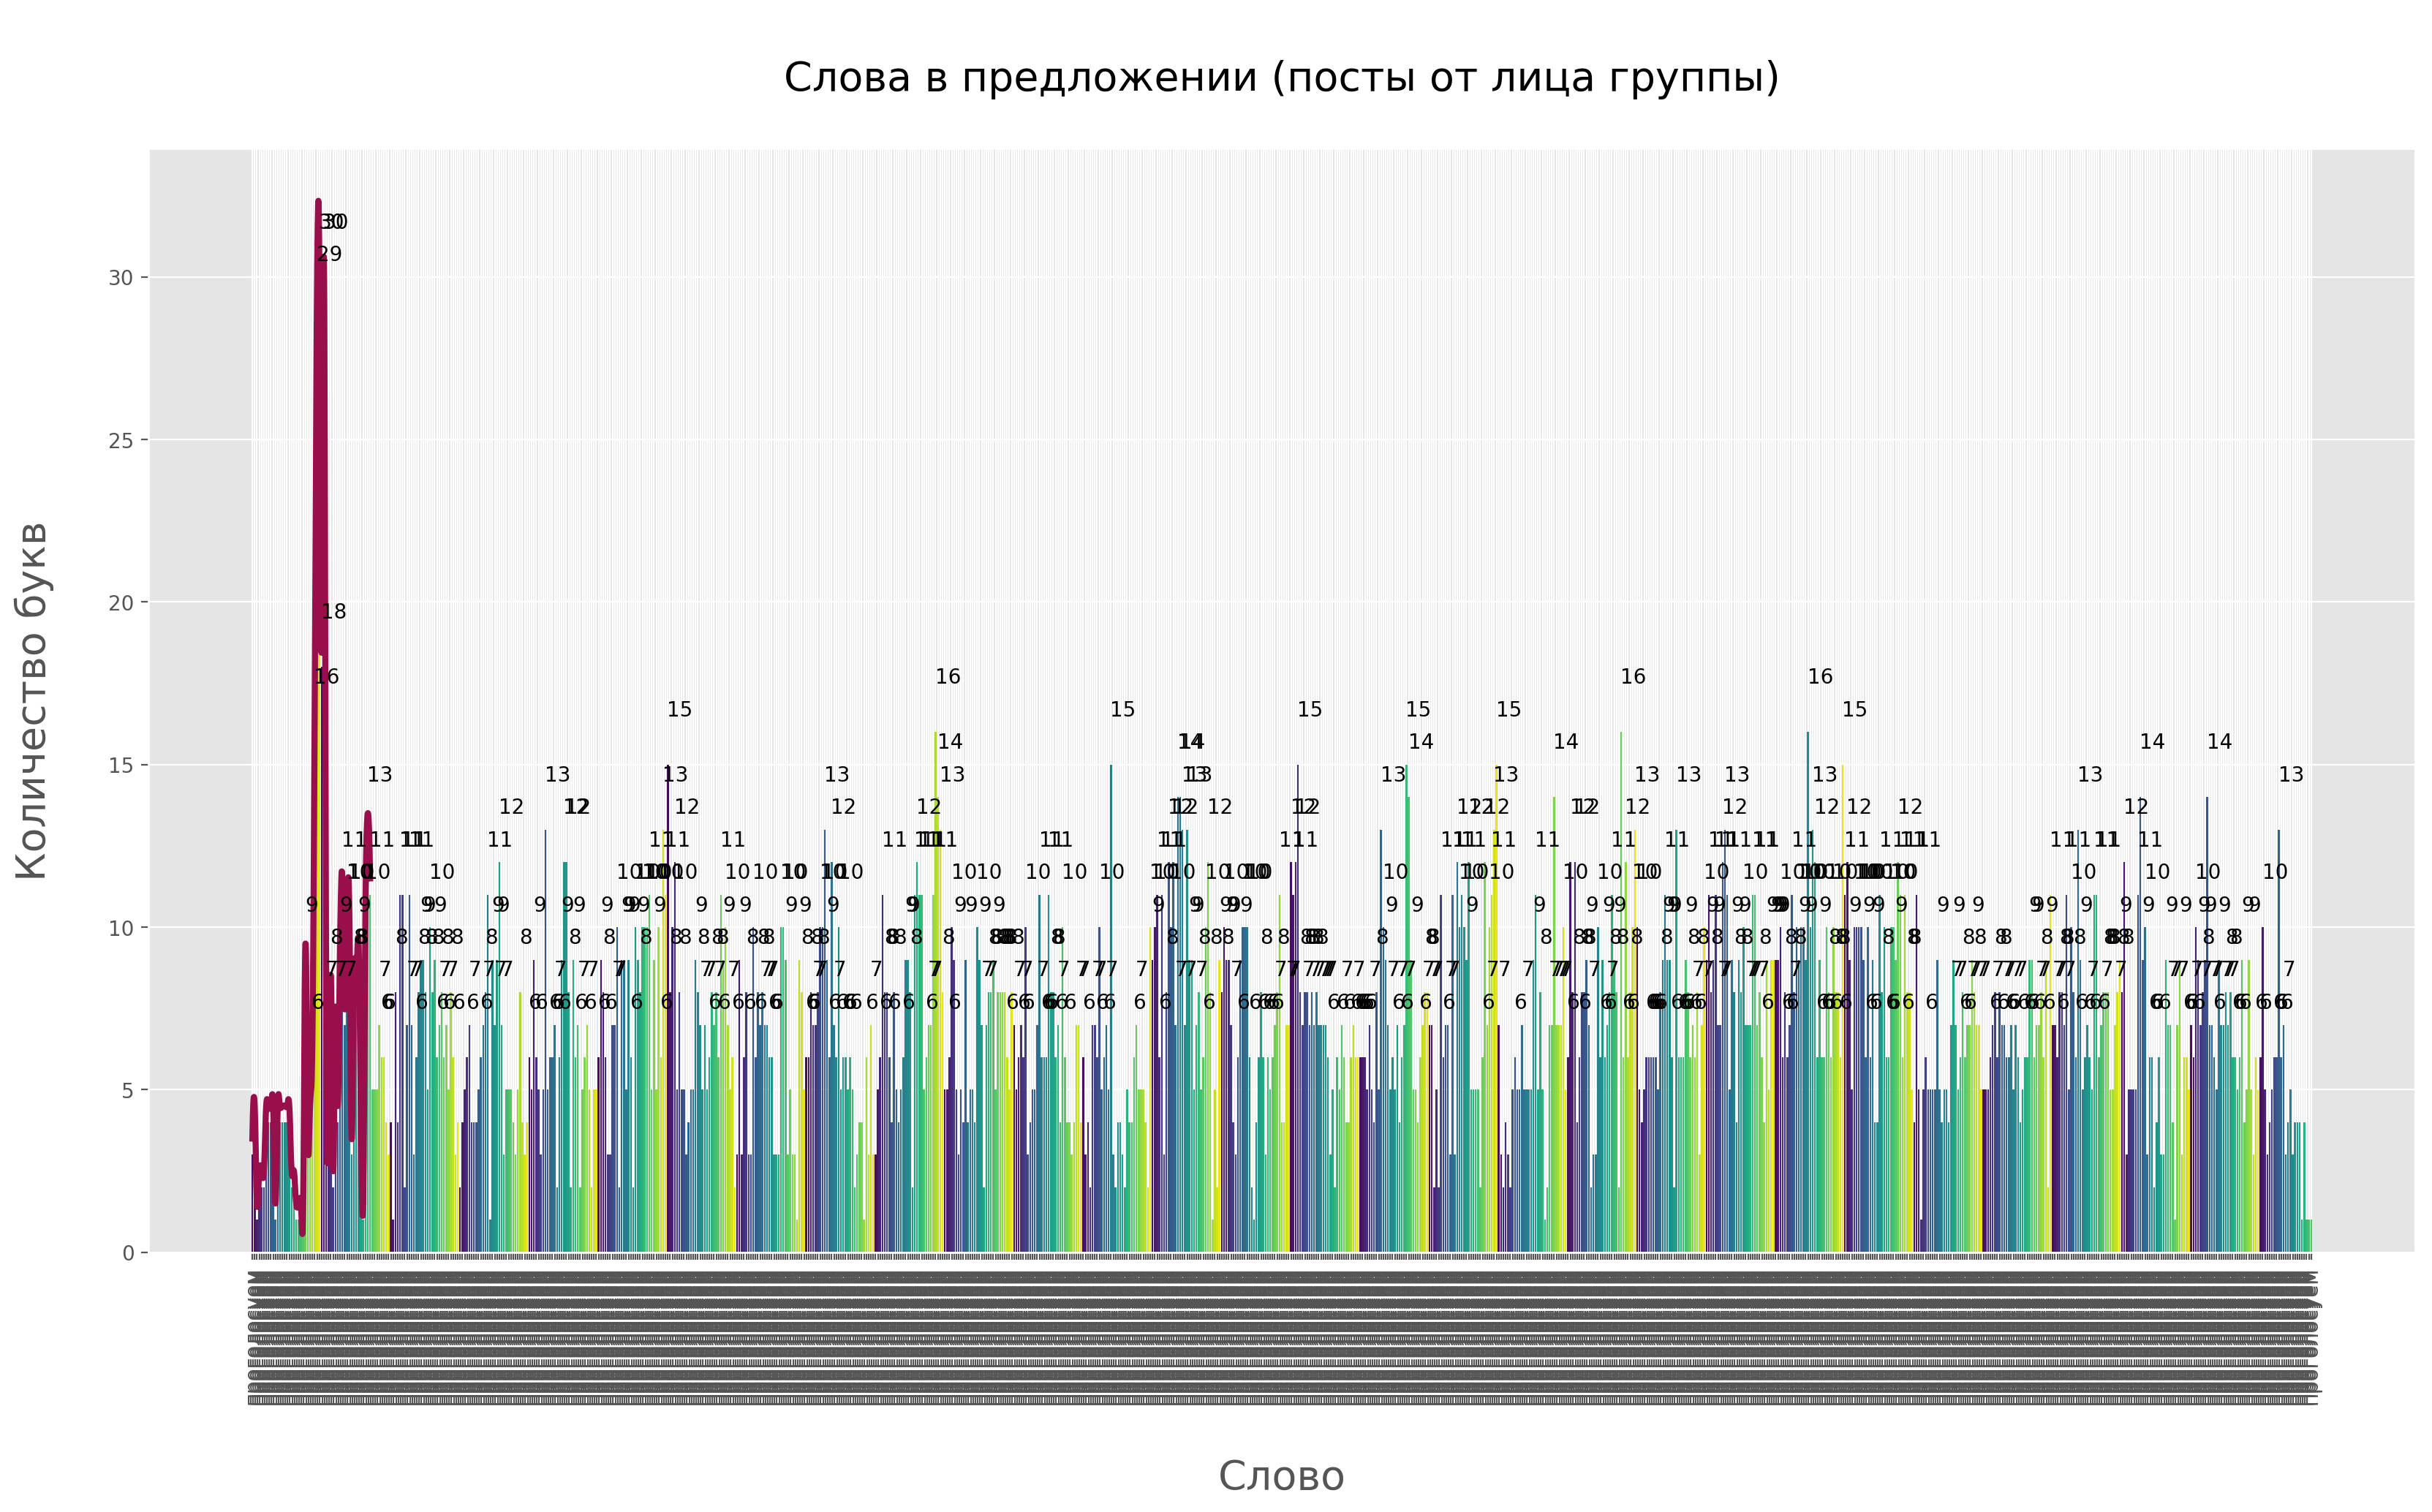

In [40]:
# отсортируем данные по названиям городов
dictionary_nums = [c[1] for c in sorted(dictionary.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictionary_labs = sorted([w for dic in dictionary]) # подписи по оси x
x = range(len(dictionary_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(dictionary_nums)) 
f = interp1d(x, [x+0.5 for x in dictionary_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, dictionary_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, dictionary_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))
        
plt.title('\nСлова в предложении (посты от лица группы)\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=20)
plt.xlabel('\nСлово',  fontsize=20)
plt.xticks(x, dictionary_labs, rotation=90)
plt.show()

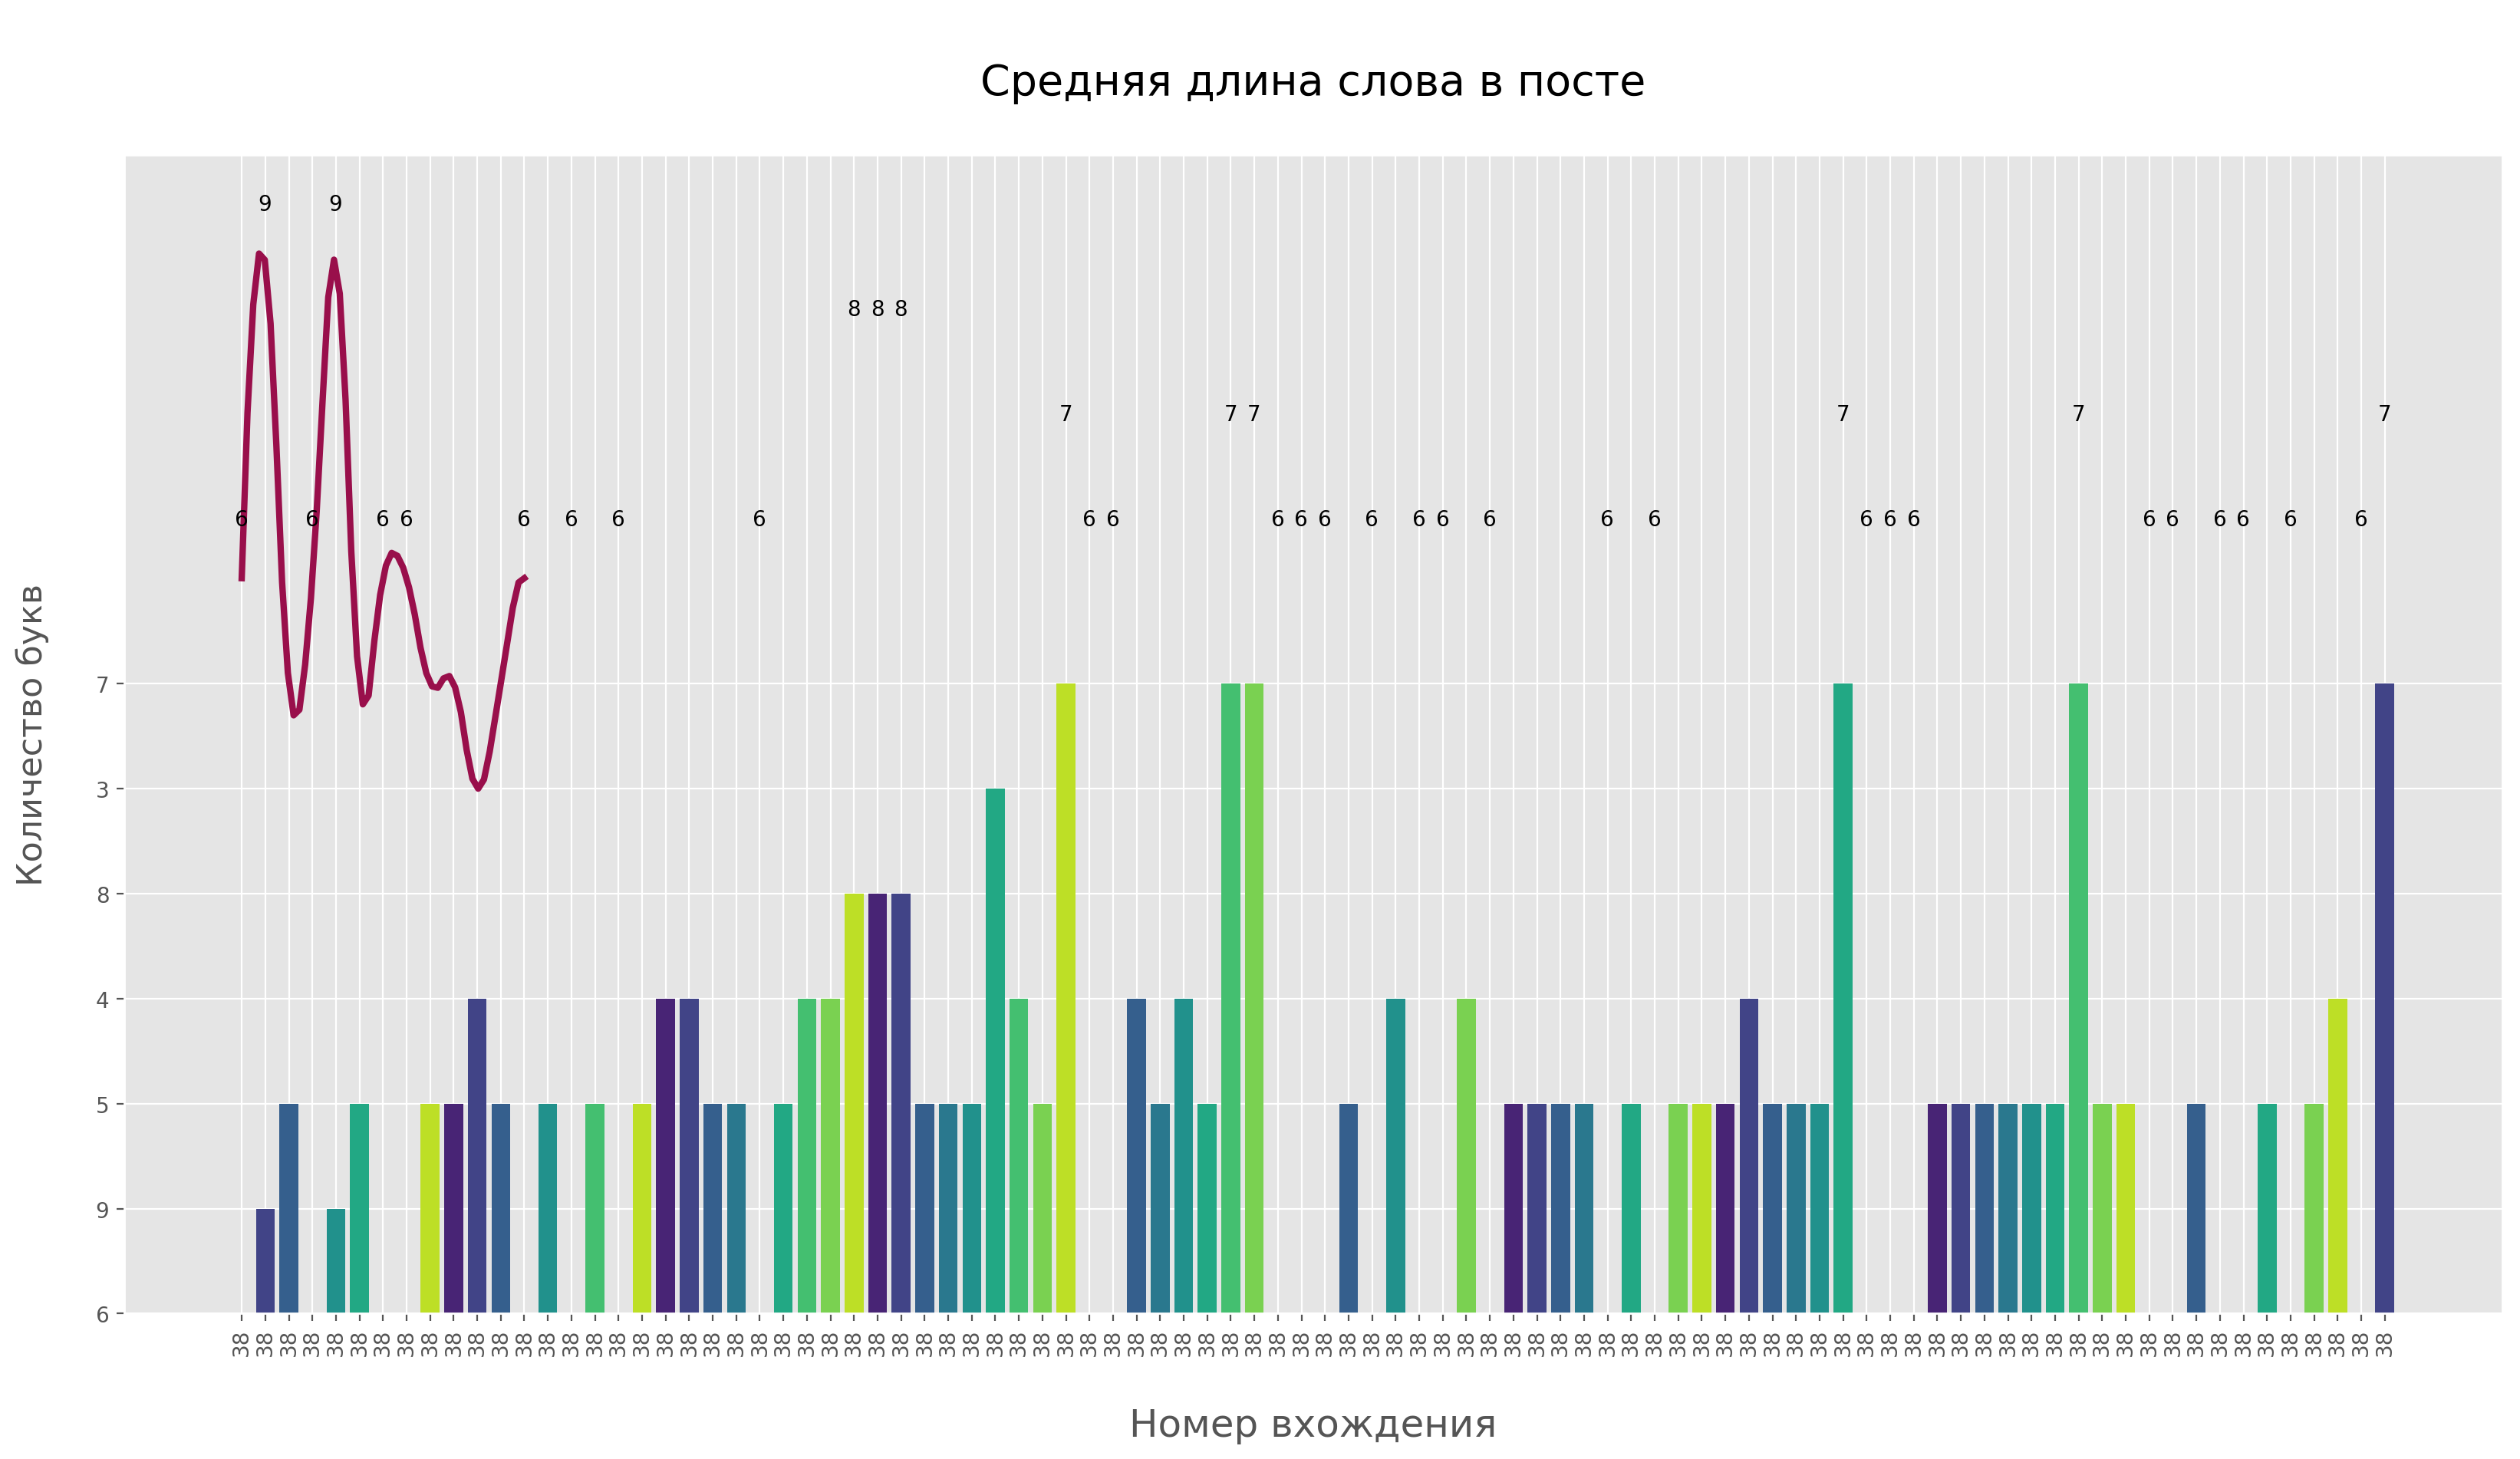

In [37]:
# отсортируем данные по названиям городов
average_nums = [c[1] for c in sorted(average.items(), key=lambda x: x[0], reverse=True)] # данные по оси y
average_labs = sorted([i for aver in average]) # подписи по оси x
x = range(len(average_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', int(max(average_nums)))
f = interp1d(x, [int(x)+1 for x in average_nums], kind='quadratic')
x_new = np.linspace(0, 12) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, average_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, average_nums):
    if int(b) > 5:
        plt.scatter(a, int(b)+1.5, s=0)
        plt.text(a-0.3, int(b)+1.5, str(b))
        
plt.title('\nСредняя длина слова в посте\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=16)
plt.xlabel('\nНомер вхождения',  fontsize=18)
plt.xticks(x, average_labs, rotation=90)
plt.show()

In [14]:
# вообще значения параметров удобнее хранить в переменных и подставлять в шаблон запроса
req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-20601736&post_id=379674&offset=18&count=150&v=5.92&need_likes=1&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b&extended=1') 

# да, так тоже можно, не обязательно делать это с with, как в примере выше
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')
print(result)
type(result)
import json
data = json.loads(result)
print(type(data))
resp = {}


{"response":{"count":1089,"items":[{"id":379693,"from_id":287413964,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201021,"text":"Нет","likes":{"count":1,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379694,"from_id":243351468,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201032,"text":"Ставлю себя на место Рика и уверен,что даже в мыслях не было бы варианта с пощадой","likes":{"count":26,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379695,"from_id":268145905,"post_id":379674,"owner_id":-20601736,"parents_stack":[],"date":1556201037,"text":"ДА ДА ДА","likes":{"count":1,"user_likes":0,"can_like":1},"thread":{"count":0,"items":[],"can_post":true,"show_reply_button":true,"groups_can_post":true}},{"id":379696,"from_id":249659768,"post_id":379674,"owner_id":-20601736,"parents_st

In [15]:
data['response']['items']

[{'id': 379693,
  'from_id': 287413964,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201021,
  'text': 'Нет',
  'likes': {'count': 1, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 379694,
  'from_id': 243351468,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201032,
  'text': 'Ставлю себя на место Рика и уверен,что даже в мыслях не было бы варианта с пощадой',
  'likes': {'count': 26, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': True,
   'show_reply_button': True,
   'groups_can_post': True}},
 {'id': 379695,
  'from_id': 268145905,
  'post_id': 379674,
  'owner_id': -20601736,
  'parents_stack': [],
  'date': 1556201037,
  'text': 'ДА ДА ДА',
  'likes': {'count': 1, 'user_likes': 0, 'can_like': 1},
  'thread': {'count': 0,
   'items': [],
   'can_post': 

In [10]:
i = 0
amounts0 = []
amounts20 = []
dictionary0 = {}
average0 = {}
replacement0 = {}
idd = []
f = open('table_file2.csv', 'w', encoding = 'utf-8-sig')
f.write("Id; Text; Date; Likes\n")


for word in str(data['response']['items'][i]):
    text3 = str(data['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')
    text3 = RE_EMOJI.sub('', text3)
    text33 = re.sub(' ','',text3)
    amounts20.append(len(text33))
    #text31 = re.sub(r'[^a-zA-Z0-9 ]', '', text3)
    #text32 = re.sub(r'[^a-zA-Z0-9 ]', '', text31)
    text2 = re.sub(r'—', ' ', str(text3))#.sub(r',', ' ', str(text3))#.sub('.',' ', text3).sub(',',' ', text3).sub('"',' ', text3).sub('(',' ', text3).sub(')',' ', text3).sub('[',' ', text3).sub(']',' ', text3)
    #text2 = re.sub(r'[^a-zA-Z0-9 ]', '', text33)
    text2 = RE_EMOJI.sub('', text2)
    lst = text2.split()
    for w in lst:
        dictionary0[str(w)]=len(w)
        replacement0[str(w)]=len(w)
    text = str(data['response']['items'][i]['text'])

    print(data['response']['items'][i]['text'])
    print('Число букв ' + str(len(text33)))
    print('Число слов ' + str(len(lst)))
    if len(text3) != 0 or len(lst) != 0:
        print('Средняя длина слова ' + str(len(text33)//len(lst)))
        average0[str(i)]=str(len(text33)//len(lst))
    print(' ')
    print(' ')
    print(' ')
    amounts0.append(lst)
    
    
    user_id = str(data['response']['items'][i]['id'])
    date = str(data['response']['items'][i]['date'])
    likes = str(data['response']['items'][i]['likes'])
    f.write('%s; %s; %s; %s\n' % (str(data['response']['items'][i]['id']), str(text2).replace('\n',''), str(data['response']['items'][i]['date']), str(data['response']['items'][i]['likes']['count'])))
    idd.append(user_id)
    
    i += 1
    
    #req = urllib.request.Request('https://api.vk.com/method/users.get?v=5.92&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b&user_ids=%s' % (str(data['response']['items'][i]['id'])))
    #response = urllib.request.urlopen(req) 
    #result = response.read().decode('utf-8')
    #data = json.loads(result) 
    #if 'first_name' not in (data['response'][i]):
    #    continue
    #if 'last_name' not in (data['response'][i]):
    #    continue
    #if 'bdate' not in (data['response'][i]):
    #    continue
    #if 'home_town' not in (data['response'][i]):
    #    continue   
    #if 'id' not in (data['response'][i]):
    #    continue
    
    #u.write('%s; %s; %s; %s; %s\n' % (str(data['response']['items'][i]['first_name']), (str(data['response']['items'][i]['last_name']), str(data['response']['items'][i]['sex']), str(data['response']['items'][i]['bdate'], (str(data['response']['items'][i]['home_town'], str(data['response']['items'][i]['id'])))))))

    if i == 99:
        break
        
print(amounts0)
total0 = 0
for lst in amounts0:
    print(len(lst))
    total0 += len(lst)
print('Общее число слов в предложении ' + str(total0))
print('Общее число символов в предложении ' + str(sum(amounts20)))
print('Средняя длина слова ' + str(sum(amounts20)//total0))

#print(dictionary)
sorted(dictionary0.items(), key=lambda x: x[1], reverse=True)

sorted(average0.items(), key=lambda x: x[1], reverse=True)
#print(data['response']['items'][0]['text'])
#print(data['response']['items'][1]['text'])
#print(data['response']['items'][2]['text'])
#print(data['response']['items'][3]['text'])
print(idd)

Сегодня будет что-то интересное. 😏
Число букв 28
Число слов 4
Средняя длина слова 7
 
 
 
Давайте обсудим 13 серию «Ходячих мертвецов» по-настоящему, со спойлерами. Пишите все мысли, появившиеся после просмотра. 

🔥ОСТОРОЖНО, В КОММЕНТАРИЯХ ВОЗМОЖНЫ СПОЙЛЕРЫ!🔥

Если вы пропустили новый эпизод, настоятельно рекомендуем не заглядывать в комментарии и посмотреть повтор в воскресенье ночью на FOX.
Число букв 259
Число слов 39
Средняя длина слова 6
 
 
 
Она хочет только одного!

Смотрите новую серию «Ходячих мертвецов» сегодня в 19:00 МСК на FOX.
Число букв 78
Число слов 15
Средняя длина слова 5
 
 
 
Вдохновение, которого нам не хватало в этот Международный женский день. 😎
Число букв 60
Число слов 10
Средняя длина слова 6
 
 
 
Прекрасные дамы, поздравляем вас с праздником 8 марта! 🌷

Как замечательно, что вы все такие разные: сильные, как Мишон, смелые, как Джудит, непоколебимые, как Кэрол, нежные и заботливые, как Лорен. И как прекрасно, что мужчины готовы на все ради вас!
Число букв 19

In [38]:
# отсортируем данные по названиям городов
dictionary0_nums = [c[1] for c in sorted(dictionary0.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictionary0_labs = sorted([w for dic0 in dictionary0]) # подписи по оси x
x = range(len(dictionary0_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
#colors = sns.color_palette('viridis', max(dictionary0_nums)) 
#f = interp1d(x, [x+0.5 for x in dictionary0_nums], kind='quadratic')
#x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
#y_smooth = f(x_new)
#plt.figure(figsize=(20, 10), dpi=200)
#plt.bar(x, dictionary0_nums, color=colors)
#plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
#for a, b in zip(x, dictionary0_nums):
#    if b > 5:
#        plt.scatter(a, b+1.5, s=0)
#        plt.text(a-0.3, b+1.5, str(b))
        
#plt.title('\nСлова в предложении (комментарии)\n',  fontsize=20)
#plt.ylabel('Количество букв\n',  fontsize=20)
#plt.xlabel('\nСлово',  fontsize=20)
#plt.xticks(x, dictionary0_labs, rotation=90)
#plt.show()

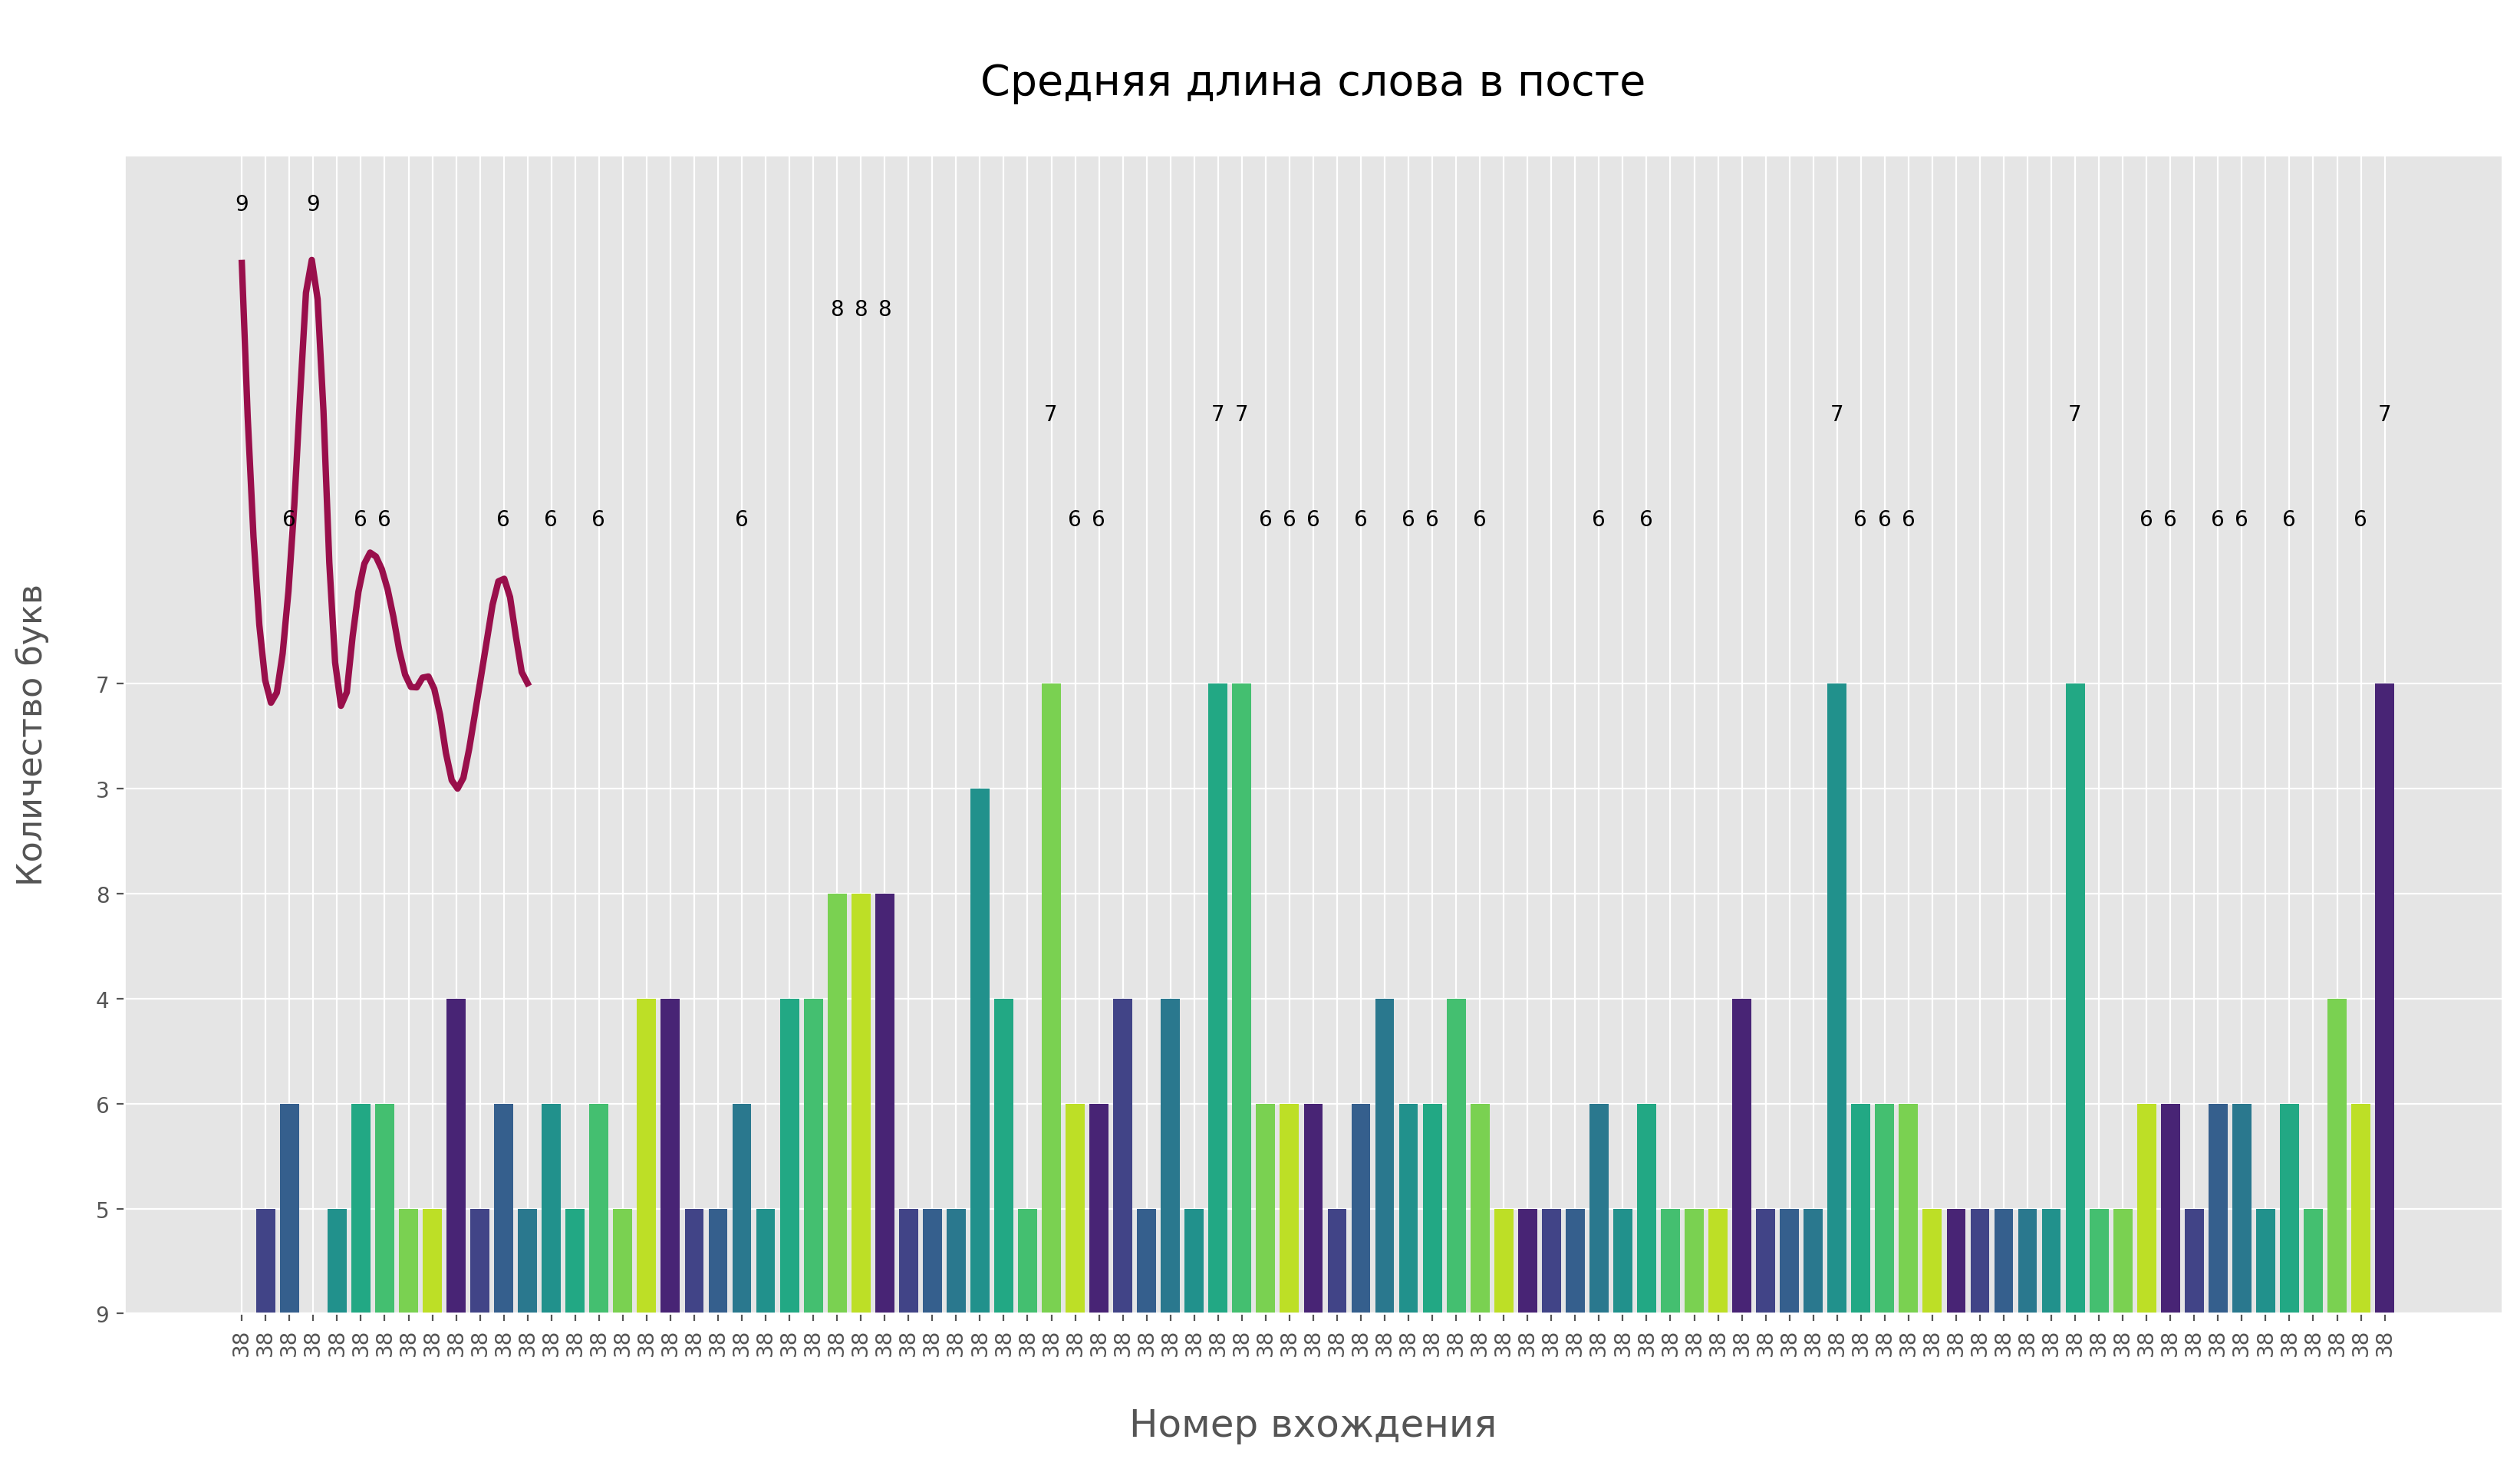

In [39]:
# отсортируем данные по названиям городов
average0_nums = [c[1] for c in sorted(average0.items(), key=lambda x: x[0], reverse=True)] # данные по оси y
average0_labs = sorted([i for aver in average0]) # подписи по оси x
x = range(len(average0_labs)) # данные по оси x
# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', int(max(average0_nums)))
f = interp1d(x, [int(x)+1 for x in average0_nums], kind='quadratic')
x_new = np.linspace(0, 12) # тут нужны min и max по оси x
y_smooth = f(x_new)
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, average0_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')

# рисуем точки максимумов (условных)
for a, b in zip(x, average0_nums):
    if int(b) > 5:
        plt.scatter(a, int(b)+1.5, s=0)
        plt.text(a-0.3, int(b)+1.5, str(b))
        
plt.title('\nСредняя длина слова в посте\n',  fontsize=20)
plt.ylabel('Количество букв\n',  fontsize=16)
plt.xlabel('\nНомер вхождения',  fontsize=18)
plt.xticks(x, average0_labs, rotation=90)
plt.show()

In [13]:
cities = []
bdays = []
fnames = []
lnames = []
deacts = []
ids = []

In [14]:
users = set()
offsets = [0, 1000, 2000, 3000, 4000]
token = 'e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b'
version = '5.92'
group = 'twd_russia'

for off in offsets:
    req = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=%s&access_token=%s&v=%s&offset=%s'  % (group, token, version, off))
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    users = users | set(data['response']['items'])
len(users)

5000

In [22]:
#bdays = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=bdate'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'bdate' not in (data['response'][0]):
        #bdays.append('unknown')
    bdays.append(data['response'][0]['bdate'])
    i += 1
print(len(bdays))

KeyboardInterrupt: 

In [23]:
print(bdays)

['23.7.1988', '2.11', '28.11.1983', '19.5', '16.1.1990', '11.2', '14.9.1987', 'unknown', '9.4.1984', '8.4.1989', '28.10', '21.4', '21.12.1986', '28.1.1990', '7.12', '10.4.1988', '11.5', '19.1', 'unknown', '6.11', '23.10', '29.1', '2.4', '20.9.1920', 'unknown', '1.8.1990', '28.1.1992', '9.3.1968', '14.11.1985', 'unknown', '24.2', '27.10', '14.6', '23.7', '12.2.1988', '29.7.1986', 'unknown', 'unknown', '2.2.1987', '2.12', '8.2', '29.8', '23.1.1990', '23.9', '25.1', 'unknown', '22.10.1988', '19.12', '3.3.1992', '22.5.1984', '1.2', '21.12.1993', 'unknown', '14.5.1987', '17.10', '3.2.1984', 'unknown', '26.10.1989', 'unknown', '28.12.1987', '26.12', '15.3', '9.2', 'unknown', 'unknown', 'unknown', '21.12.1910', '9.1.1990', '27.5.1991', '6.10.1985', 'unknown', '30.4.1988', '12.3', '23.7', '14.5.1992', '8.6', '12.10.1988', '8.11', 'unknown', '20.5.1990', '14.4', '15.7', 'unknown', '9.9', '13.12.1985', '15.2.1982', 'unknown', '9.12.1982', 'unknown', '7.3', '2.10.1984', '11.9.1988', '21.3', '21.3

In [19]:
cities = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=home_town'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        cities.append('unknown')
    else:
        cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

150


In [20]:
print(cities)

['Санкт-Петербург', 'Питер', 'Россия', 'Санкт-Петербург', 'Черноголовка', 'Санкт-Петербург', '', 'Санкт-Петербург', 'Грозный', 'Ленинград', 'Екатеринбург', 'ShitCity', 'Москва', 'Балашиха', 'Москва', 'Зеленоград', '', 'Северная Пальмира - уголок мира', 'Питер', 'Сургут, ВРН', 'Санкт-Петербург', 'Челябинск', 'Москва', 'Владивосток', 'Ленинград', 'Дмитров', 'Saint-Petersburg', 'Город-герой Москва', 'Киров', 'Петербург', 'Псков', '', '...', 'Гомель', 'Москва', 'Ленинград', 'Москва', 'Питер', '', 'СПб', 'Санкт-Петербург', 'Москва', 'Полоцк', 'Одинцово', 'Ялуторовск', 'Санкт - Петербург', 'Пенза', 'Санкт-Петербург', 'Отрадное,Санкт-Петербург', 'Ленинград', 'Одесса', '', 'Санкт-Петербург', '', 'Москва', '', 'RainCity', 'M O S C O W', 'Москва', 'Санкт-Петербург, Кингисепп, Невинномыск', 'Сургут', '', 'Уфа', 'Новосибирск', 'Тюмень', 'Москва', '', 'Made on Kamchatka', 'Wonderland', 'Космополитка', 'Москвабад , Раменское', 'Ленинград', 'Лодейное Поле', 'Москва', 'Унгены', 'Екатеринбург', 'Запоро

In [38]:
u = open('user_information45.csv', 'w', encoding = 'utf-8-sig')
u.write("First name; Last name; Sex; Birthday; Home town; Id\n")


52

In [24]:
fnames = []
lnames = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=first_name,last_name'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'first_name' not in (data['response'][0]):
        fnames.append('unknown')
    else:
        fnames.append(data['response'][0]['first_name'])
    if 'last_name' not in (data['response'][0]):
        lnames.append('unknown')
    else:
        lnames.append(data['response'][0]['last_name'])
    i += 1
print(len(fnames))
print(len(lnames))

1001
1001


In [25]:
print(fnames)
print()
print()
print()
print(lnames)

['Dmitry', 'Regina', 'Konstantin', 'Alexandra', 'Viktoria', 'Kirill', 'Mikhail', 'Natalia', 'Ekaterina', 'Shamil', 'Alexander', 'Olga', 'Andrey', 'Anatoly', 'Olga', 'Igor', 'Darya', 'Ekaterina', 'Natasha', 'Artyom', 'Irina', 'Lida', 'Dmitry', 'David', 'Maria', 'Regina', 'Vladislav', 'Ivan', 'Daniil', 'Daniella', 'Yulia', 'Alyona', 'Romario', 'Mikhail', 'Sergey', 'Maria', 'Valentin', 'Slava', 'Artem', 'Yulia', 'Mikhail', 'Liza', 'Evgenia', 'Natasha', 'Olga', 'Vera', 'Irina', 'Alya', 'Stas', 'Lars', 'Sergey', 'Ekaterina', 'Evgeny', 'Igor', 'Oleg', 'Rustam', 'Ekaterina', 'Max', 'Sanya', 'Pavel', 'Vadim', 'Darya', 'Anastasia', 'Yulya', 'Alexey', 'Dmitry', 'Vera', 'Alexander', 'Alexander', 'Mikhail', 'Evgeny', 'Andrey', 'Nastyushka', 'Mikhail', 'Katya', 'Yulya', 'Paul', 'Oksana', 'Sergey', 'Regina', 'Larisa', 'Ekaterina', 'Anna', 'Alexander', 'Ren', 'Ekaterina', 'Mila', 'Yulia', 'Oksana', 'Anastasia', 'Gleb', 'Olga', 'Irina', 'Roman', 'Yulia', 'Anna', 'Viktor', 'Nadezhda', 'Ivan', 'Ekaterin

In [29]:
countries = []

i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=country'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'country' not in (data['response'][0]):
        countries.append('unknown')
    else:
        countries.append(data['response'][0]['country']['title'])
    #abouts.append(data['response'][0]['about'])
    i += 1
#print(len(deactivateds))
print(len(countries))


1001


In [30]:
print(countries)

['Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'South Korea', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'unknown', 'Russia', 'unknown', 'Ukraine', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'unknown', 'Russia', 'Russia', 'Russia', 'Russia', 'United Kingdom', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Belgium', 'Ir

In [31]:
ids = []

i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=id'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'id' not in (data['response'][0]):
        ids.append('unknown')
    else:
        ids.append(data['response'][0]['id'])
    #abouts.append(data['response'][0]['about'])
    i += 1
#print(len(deactivateds))
print(len(ids))


1001


In [32]:
print(ids)

[1490944, 1892353, 1925121, 2703362, 442372, 565256, 221196, 3448846, 761871, 794640, 245777, 647186, 1318928, 1523728, 1081365, 1884178, 1359895, 2252820, 3063832, 3080220, 1785885, 1851421, 2498601, 1294378, 655403, 1114155, 2015279, 2793522, 1327155, 172086, 475194, 434235, 2302011, 2850879, 3186752, 1572931, 163909, 778309, 172103, 2105413, 2588753, 1155154, 2359378, 2662483, 3121237, 2318424, 1163360, 2359394, 2572391, 401512, 2396766, 458858, 2244715, 2818156, 3113068, 1745006, 3293293, 41072, 393329, 1040496, 688241, 1433714, 1572981, 1941621, 2744432, 1278072, 57465, 2695290, 1310843, 860285, 2556034, 1450115, 1671300, 311429, 1704069, 1097863, 147592, 1663112, 2236552, 1056908, 196749, 1794188, 401551, 1704079, 884881, 581778, 2949261, 3145877, 1351830, 1990806, 360600, 1990807, 3326101, 3047577, 3293339, 114845, 1892510, 491679, 1761442, 1851554, 2269348, 499877, 2072741, 1286312, 49323, 131243, 860333, 1466540, 1532079, 2719915, 532658, 2277554, 3080370, 270518, 2842809, 181

In [33]:
sexes = []
i = 0
for user in users:
    if i > 149:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=sex'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'sex' not in (data['response'][0]):
        continue
    sexes.append(data['response'][0]['sex'])
    i += 1
print(len(sexes))

1001


In [34]:
print(sexes)

[2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 

In [39]:
i = 0
for iden in ids:
    for c in countries:
        for f in fnames:
            for l in lnames:
                for b in bdays:
                    for cc in cities:
                        u.write(str(fnames[i]) + ';' + str(lnames[i]) + ';' + str(sexes[i]) + ';' + str(bdays[i]) + ';' + str(cities[i]) + ';' + str(ids[i]) + '\n')
                        i += 1
                        if i > 149:
                            break
                            
# К сожалению, здесь ошибки IndexError не избежать - но в файле будут изменения

IndexError: list index out of range

In [93]:
fnames2 = Counter(fnames)

In [94]:
fnames2

Counter({'Dmitry': 40,
         'Regina': 4,
         'Konstantin': 9,
         'Alexandra': 13,
         'Viktoria': 12,
         'Kirill': 6,
         'Mikhail': 14,
         'Natalia': 3,
         'Ekaterina': 23,
         'Shamil': 2,
         'Alexander': 38,
         'Olga': 22,
         'Andrey': 34,
         'Anatoly': 3,
         'Igor': 10,
         'Darya': 10,
         'Natasha': 4,
         'Artyom': 6,
         'Irina': 13,
         'Lida': 1,
         'David': 2,
         'Maria': 23,
         'Vladislav': 2,
         'Ivan': 10,
         'Daniil': 3,
         'Daniella': 1,
         'Yulia': 23,
         'Alyona': 9,
         'Romario': 1,
         'Sergey': 23,
         'Valentin': 1,
         'Slava': 1,
         'Artem': 3,
         'Liza': 2,
         'Evgenia': 9,
         'Vera': 5,
         'Alya': 1,
         'Stas': 1,
         'Lars': 1,
         'Evgeny': 17,
         'Oleg': 9,
         'Rustam': 3,
         'Max': 4,
         'Sanya': 2,
         'Pavel': 1

In [95]:
fnames2 = dict(fnames2)
fnames2 = {f : fnames2[f] for f in fnames2 if fnames2[f] > 2 and len(f) > 2}

# сортируем словарь по значениям
sorted(fnames2.items(), key=lambda x: x[1], reverse=True)

[('Dmitry', 40),
 ('Alexander', 38),
 ('Andrey', 34),
 ('Ekaterina', 23),
 ('Maria', 23),
 ('Yulia', 23),
 ('Sergey', 23),
 ('Alexey', 23),
 ('Olga', 22),
 ('Anna', 21),
 ('Anastasia', 20),
 ('Elena', 19),
 ('DELETED', 19),
 ('Evgeny', 17),
 ('Mikhail', 14),
 ('Pavel', 14),
 ('Anton', 14),
 ('Alexandra', 13),
 ('Irina', 13),
 ('Viktoria', 12),
 ('Nikolay', 12),
 ('Svetlana', 11),
 ('Igor', 10),
 ('Darya', 10),
 ('Ivan', 10),
 ('Anya', 10),
 ('Tatyana', 10),
 ('Maxim', 10),
 ('Natalya', 10),
 ('Konstantin', 9),
 ('Alyona', 9),
 ('Evgenia', 9),
 ('Oleg', 9),
 ('Yana', 9),
 ('Marina', 8),
 ('Vladimir', 8),
 ('Oksana', 7),
 ('Roman', 7),
 ('Egor', 7),
 ('Kirill', 6),
 ('Artyom', 6),
 ('Yulya', 6),
 ('Viktor', 6),
 ('Nadezhda', 6),
 ('Vitaly', 6),
 ('Katerina', 6),
 ('Vera', 5),
 ('Vadim', 5),
 ('Nikita', 5),
 ('Margarita', 5),
 ('Ilya', 5),
 ('Regina', 4),
 ('Natasha', 4),
 ('Max', 4),
 ('Katya', 4),
 ('Ksenia', 4),
 ('Artur', 4),
 ('Kristina', 4),
 ('Natalia', 3),
 ('Anatoly', 3),
 ('Dani

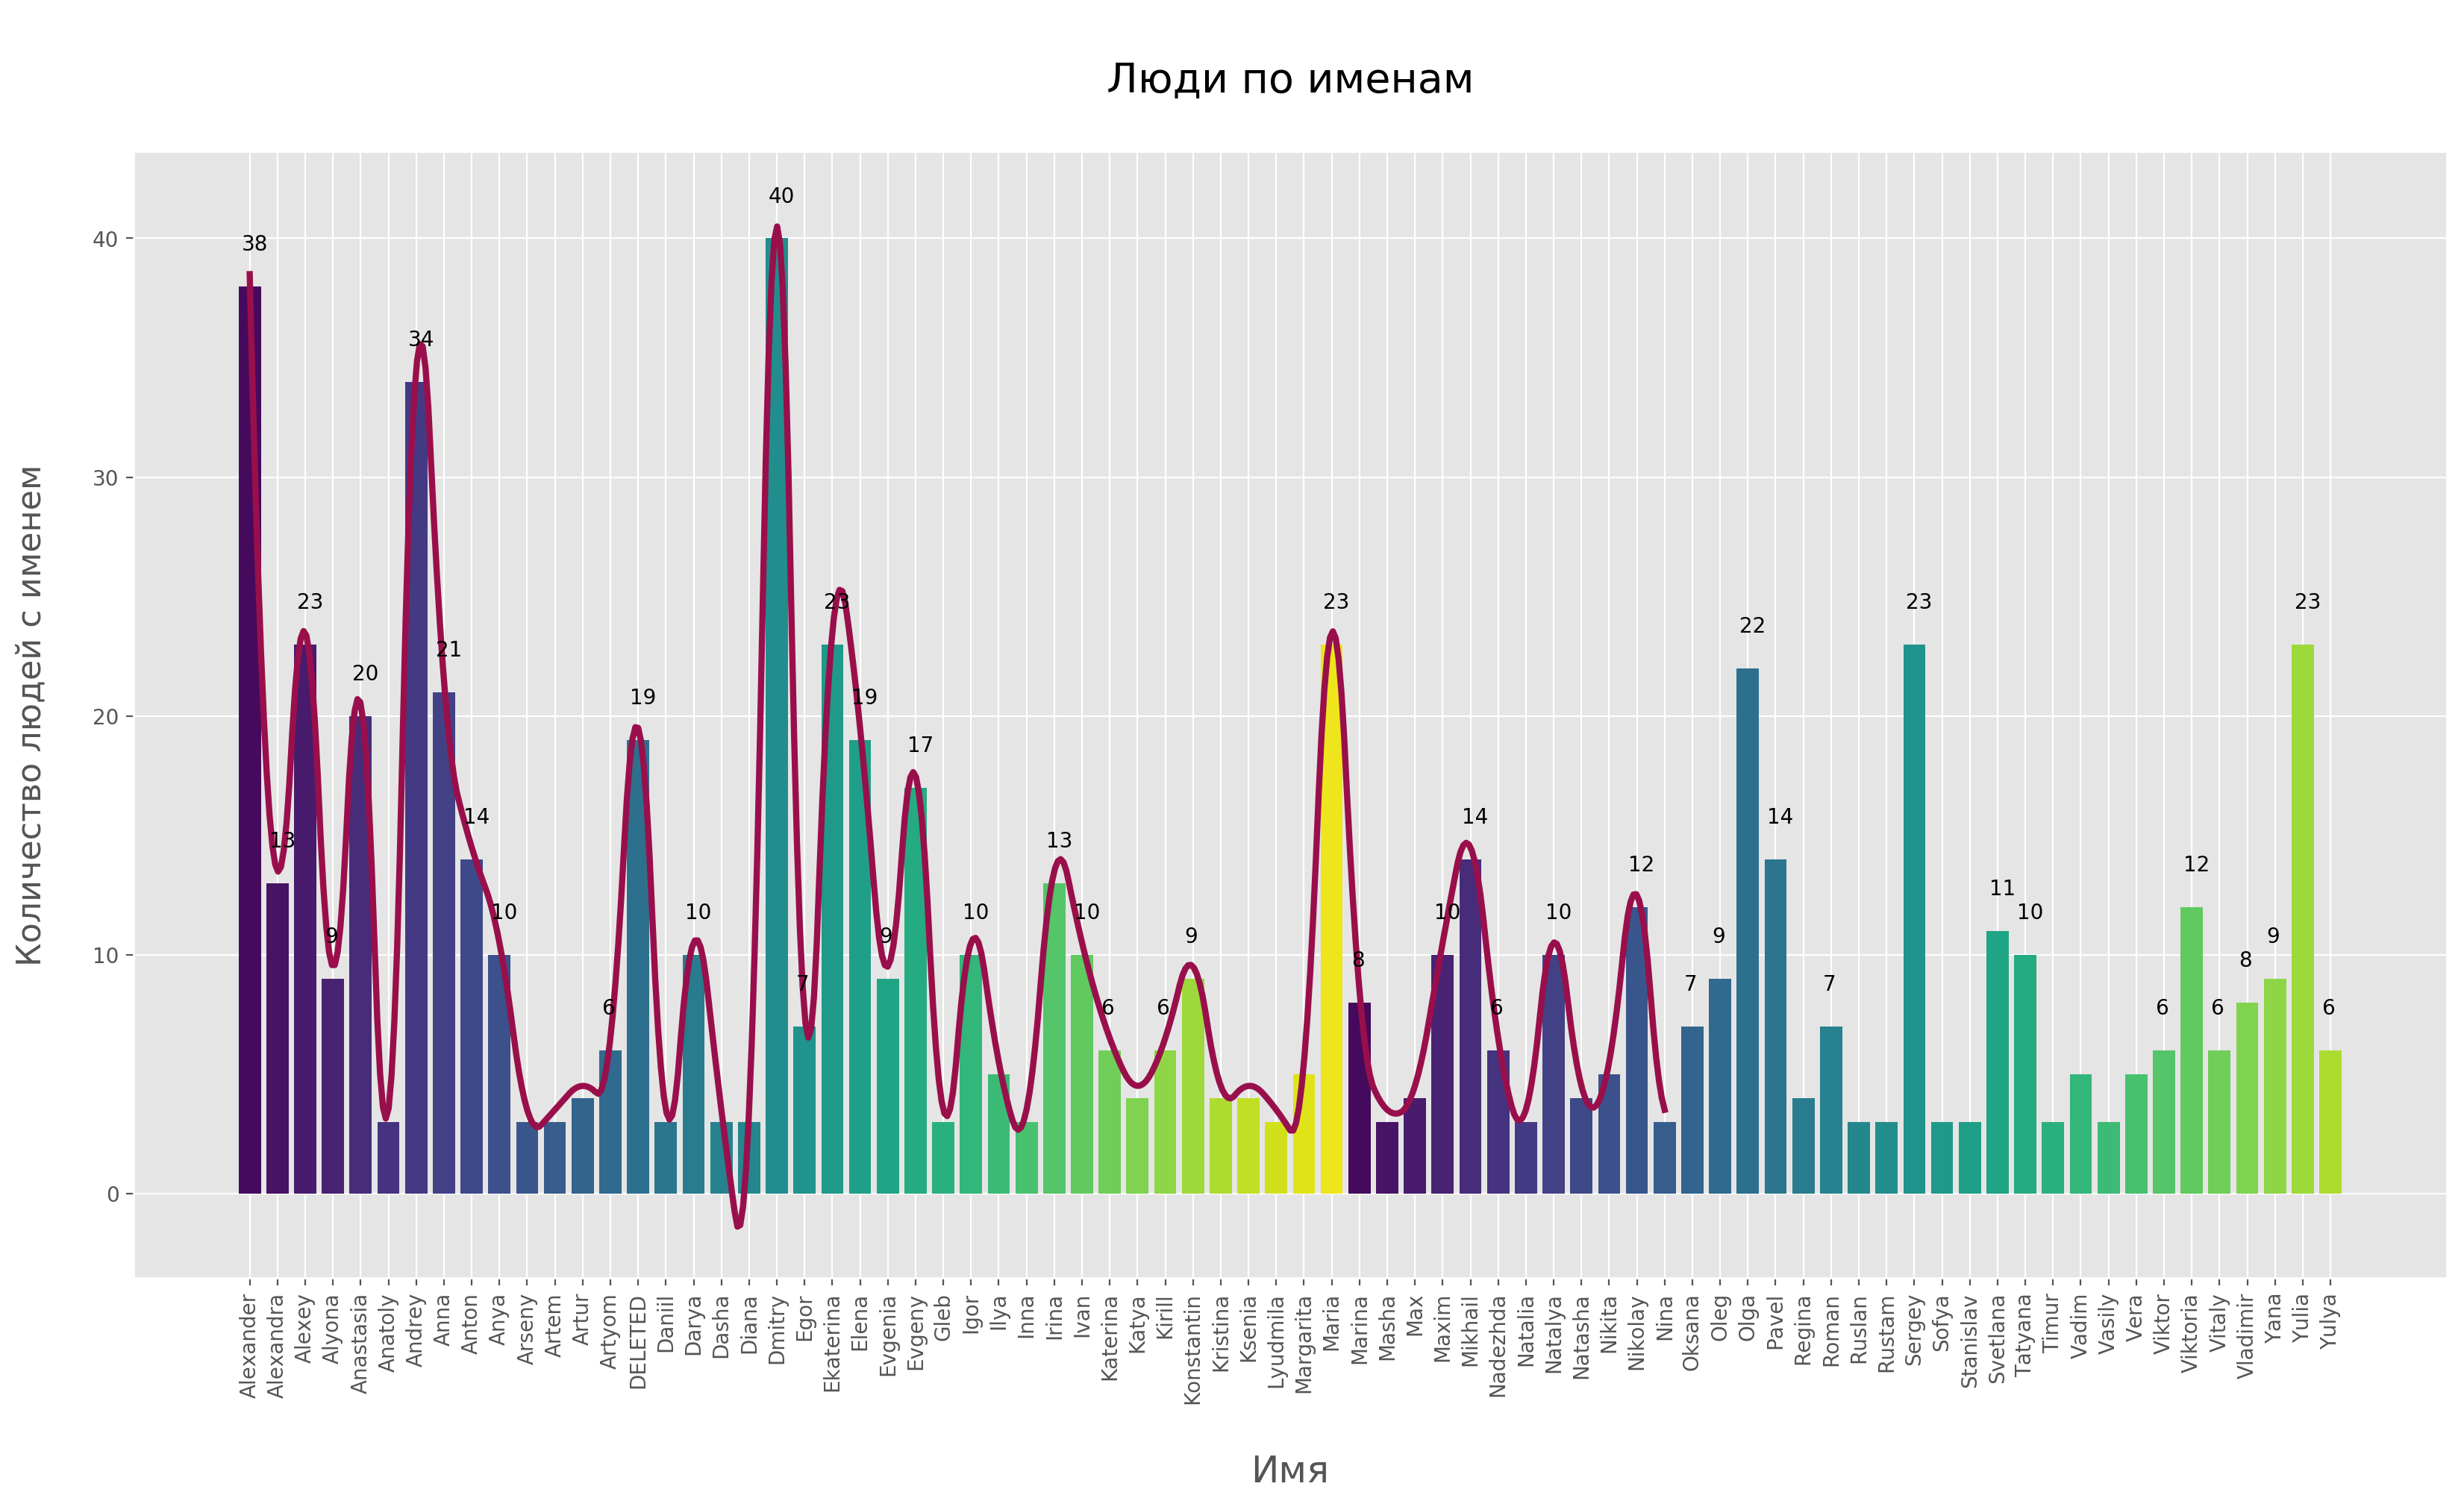

In [100]:
# отсортируем данные по названиям городов
fnames2_nums = [f[1] for f in sorted(fnames2.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
fnames2_labs = sorted([f for f in fnames2]) # подписи по оси x
x = range(len(fnames2_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(fnames2_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
f = interp1d(x, [x+0.5 for x in fnames2_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)


plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, fnames2_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
for a, b in zip(x, fnames2_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nЛюди по именам\n',  fontsize=20)
plt.ylabel('Количество людей с именем\n',  fontsize=16)
plt.xlabel('\nИмя',  fontsize=18)
plt.xticks(x, fnames2_labs, rotation=90)
plt.show()

In [115]:
#fig.savefig('temp.png', dpi=fig.dpi)

In [40]:
#sorted(average.items(), key=lambda x: x[1], reverse=True)
dictitems = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)


In [41]:
dictis = dict(dictionary)
dictis = {d : dictis[d] for d in dictis if dictis[d] > 2 and len(d) > 2}

# сортируем словарь по значениям 
sorted(dictis.items(), key=lambda x: x[1], reverse=True)

[('https//wwwinstagramcom/foxtvru', 30),
 ('https//bigdigitru/poll/voting/', 30),
 ('https//bigdigitru/poll/voting', 29),
 ('https//vkcc/8OedFO', 18),
 ('предводительницу', 16),
 ('востребованности', 16),
 ('ответственностью', 16),
 ('club31462139|FOX', 16),
 ('Присоединяйтесь', 15),
 ('непредсказуемое', 15),
 ('проголосовавших', 15),
 ('многоканального', 15),
 ('душераздирающим', 15),
 ('комментирования', 15),
 ('многочисленные', 14),
 ('фантастических', 14),
 ('обладательница', 14),
 ('телевизионного', 14),
 ('востребованным', 14),
 ('запоминающаяся', 14),
 ('запоминающимся', 14),
 ('по-настоящему', 13),
 ('Международный', 13),
 ('непоколебимые', 13),
 ('отрицательной', 13),
 ('справедливыми', 13),
 ('Приготовьтесь', 13),
 ('поздравлениям', 13),
 ('маскироваться', 13),
 ('эмоциональный', 13),
 ('ассоциируется', 13),
 ('захватывающих', 13),
 ('Авторизуйтесь', 13),
 ('восхитительны', 13),
 ('предположения', 13),
 ('заразительной', 13),
 ('КОММЕНТАРИЯХ', 12),
 ('настоятельно', 12),
 ('з

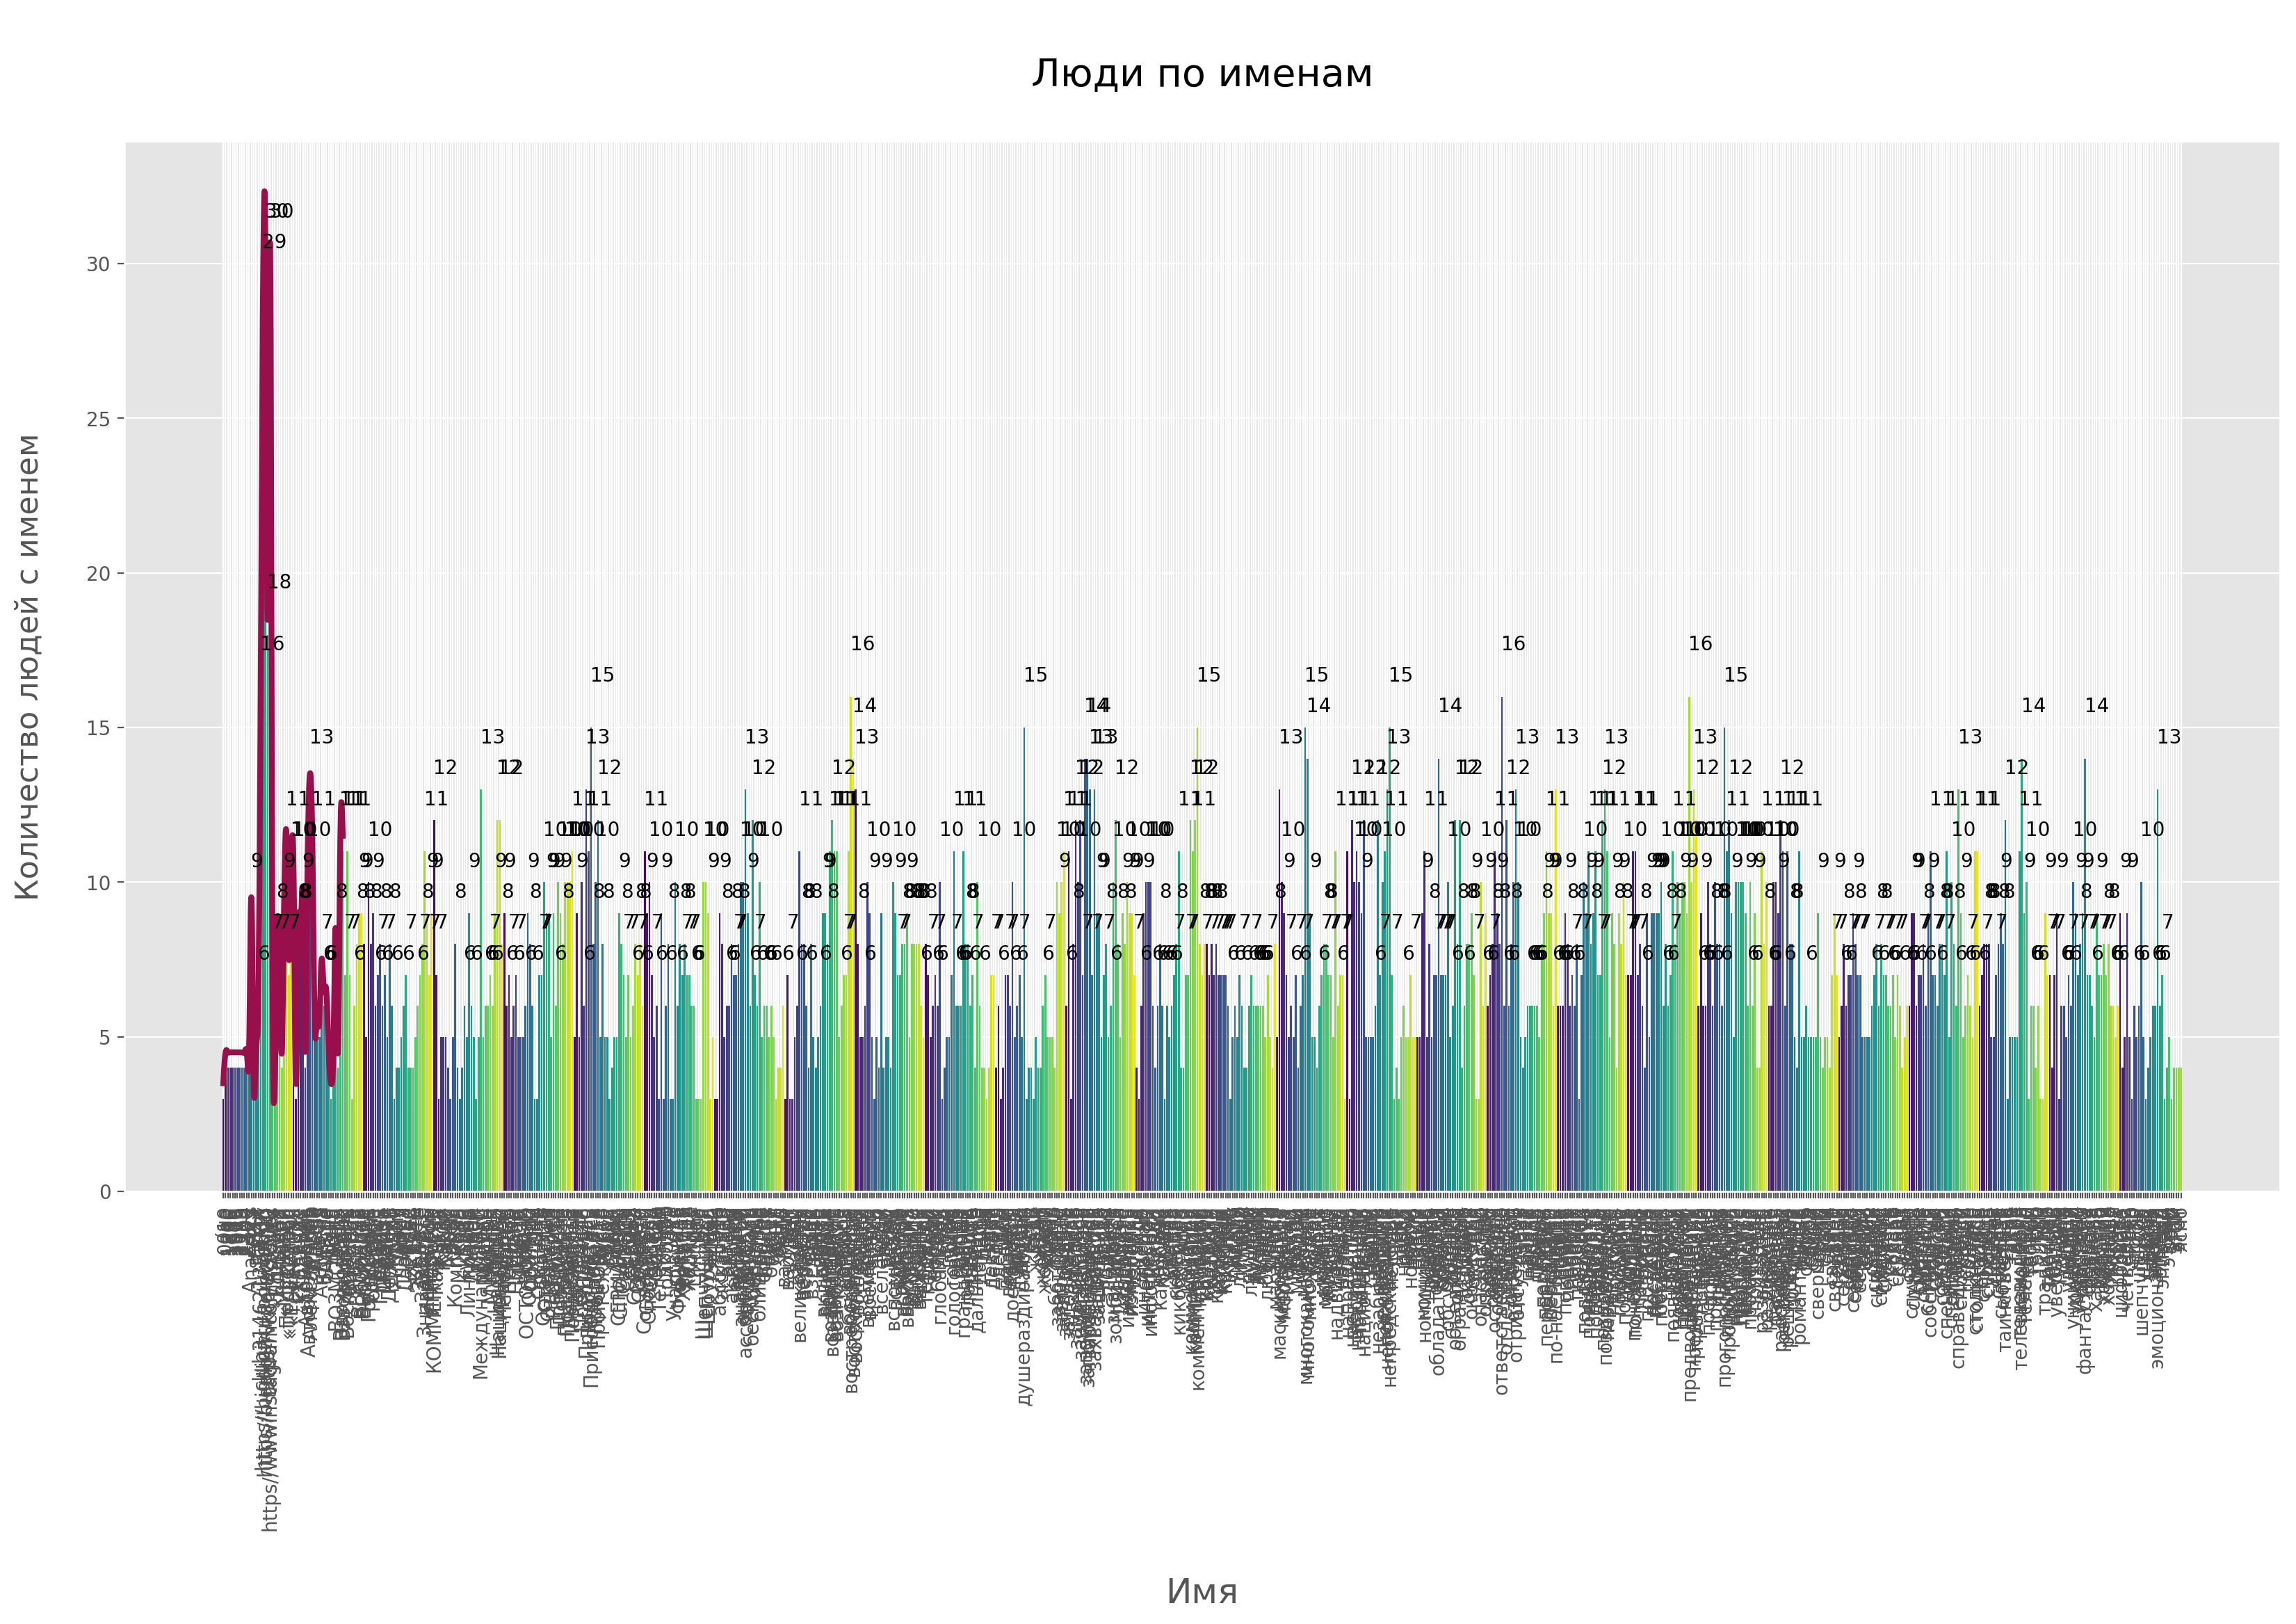

In [42]:
# отсортируем данные по названиям городов
dictis_nums = [d[1] for d in sorted(dictis.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
dictis_labs = sorted([d for d in dictis]) # подписи по оси x
x = range(len(dictis_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
colors = sns.color_palette('viridis', max(dictis_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
f = interp1d(x, [x+0.5 for x in dictis_nums], kind='quadratic')
x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
y_smooth = f(x_new)


plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, dictis_nums, color=colors)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
for a, b in zip(x, dictis_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nЛюди по именам\n',  fontsize=20)
plt.ylabel('Количество людей с именем\n',  fontsize=16)
plt.xlabel('\nИмя',  fontsize=18)
plt.xticks(x, dictis_labs, rotation=90)
plt.show()
pylab.savefig('graph.png')

In [114]:
#fig = plt.figure()
#plt.plot(range(10))
#fig.savefig('temp.png', dpi=fig.dpi)

<Figure size 432x288 with 0 Axes>

In [43]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

In [2]:
#! pip install gensim

  Using cached https://files.pythonhosted.org/packages/81/71/9692db935af93eff4448f918d05546e47b82af9b770564b930fa6336a1dc/gensim-3.7.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/9a/9b/b69aefdf7e72833f3b0e48204dcee887d821696950891a63a24f480ab72e/boto3-1.9.142-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/de/5737f602e22073ecbded7a0c590707085e154e32b68d86545dcc31004c02/s3transfer-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/68/b2/b6cef020563ae92424531b2b304015d27cf81986f25a4132c59d1e937197/botocore-1.12.142-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/83/94/7179c3832a6d45b266ddb2aac329e101367fbdb11f425f13771d27f225bb/jmespath-0.9.4-py2.py3-none-any.whl
  Stored in directory: C:\Users\ARTEM\AppData\Local\pip\Cache\wheels\2a\12\79\a26b1d566ac0edbcc806689fdf4f813ff4aaa5b5cf6e37406b
Successfully built gensim


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#! python -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/f9/fb/863012b13912709c13cf5cfdbfb304fa6c727659d6290438e1a88df9d848/pip-19.1-py2.py3-none-any.whl
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [44]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [47]:
# ЭТУ ЯЧЕЙКУ ЗАПУСКАТЬ НЕ НАДО

from tqdm import tqdm
from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

m = Mystem()
sw = stopwords.words('russian')

with open('lem4.txt', 'r', encoding='utf8') as f:
    text = f.readlines()

new_lines = []

for line in tqdm(text):
    line = ' '.join([w for w in line.split() if w not in sw])
    newline = ''.join(m.lemmatize(line))
    new_lines.append(newline)
        
with open('lem4_lem.txt', 'w', encoding='utf8') as f1:
    for line in new_lines:
        f1.write(line)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARTEM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.99s/it]


In [24]:
#! pip install tqdm
#! pip install pymystem3

In [48]:
f = 'lem4_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

In [49]:
%time model_lem4 = gensim.models.Word2Vec(data, size=300, window=5, min_count=2, workers=2)

C:\ANACONDA-3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
2019-05-04 21:16:16,934 : INFO : collecting all words and their counts
2019-05-04 21:16:16,935 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-04 21:16:16,937 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-04 21:16:16,938 : INFO : collected 571 word types from a corpus of 1113 raw words and 1 sentences
2019-05-04 21:16:16,939 : INFO : Loading a fresh vocabulary
2019-05-04 21:16:16,940 : INFO : effective_min_count=2 retains 181 unique words (31% of original 571, drops 390)
2019-05-04 21:16:16,941 : INFO : effective_min_count=2 leaves 723 word corpus (64% of original 1113, drops 390)
2019-05-04 21:16:16,943 : INFO : deleting the raw counts dictionary of 571 items
2019-05-04 21:16:16,960 :

Wall time: 1.64 s


In [50]:
model_lem4.init_sims(replace=True)
model_path = "lem4.bin"

print("Saving model...")
model_lem4.wv.save_word2vec_format(model_path, binary=True)

2019-05-04 21:16:46,294 : INFO : precomputing L2-norms of word weight vectors


Saving model...


2019-05-04 21:16:46,523 : INFO : storing 181x300 projection weights into lem4.bin
2019-05-04 21:16:46,524 : WARNING : this function is deprecated, use smart_open.open instead


In [51]:
print(len(model_lem4.wv.vocab))

181


In [52]:
print(sorted([w for w in model_lem4.wv.vocab]))

['МСК', 'а', 'авторизоваться', 'актер', 'актриса', 'альфа', 'большой', 'быть', 'в', 'ваш', 'вернуться', 'весь', 'вид', 'возвращение', 'возможный', 'вопрос', 'воскресение', 'враг', 'временный', 'время', 'все', 'вселенная', 'входить', 'выбирать', 'выживать', 'выходной', 'генри', 'героиня', 'герой', 'год', 'голос', 'голосовать', 'готовый', 'граймс', 'гурира', 'давать', 'далеко', 'данай', 'делиться', 'день', 'думать', 'дэрил', 'ее', 'если', 'ждать', 'желать', 'жизнь', 'жить', 'забывать', 'заглядывать', 'замечать', 'заниматься', 'и', 'изменяться', 'именно', 'интересный', 'кадр', 'каждый', 'как', 'какой', 'канал', 'комментарий', 'компания', 'конкурс', 'который', 'кудлиц', 'кэрол', 'личный', 'лорен', 'любимый', 'мертвец', 'мишон', 'мнение', 'мой', 'момент', 'мужчина', 'называть', 'насколько', 'настоятельно', 'настоящий', 'находить', 'национальный', 'наш', 'не', 'немного', 'ниган', 'но', 'новость', 'новый', 'номинация', 'номинировать', 'ночь', 'обсуждать', 'обсуждение', 'община', 'одячий', 'ор

In [48]:
#print(model_lem4.wv.most_similar(positive=["рик", "ходячий"], negative=["ниган"], topn=1))

[('община', 0.17603980004787445)]


In [25]:
lemmat = open('lem4_lem.txt','r',encoding='utf-8-sig')
lemmat = lemmat.read()
lemmat = lemmat.split()
#print(lemmat)

lemmat = Counter(lemmat)
print(lemmat)


Counter({'ходячий': 33, 'мертвец': 25, 'комментарий': 23, 'серия': 17, 'новый': 17, 'сегодня': 13, 'сериал': 13, 'в': 10, 'МСК': 10, 'пропускать': 9, 'как': 9, 'который': 8, 'самый': 8, 'вернуться': 8, 'телеканал': 8, 'одячий': 8, 'возможный': 7, 'эпизод': 7, 'момент': 7, 'ваш': 7, 'свой': 7, 'хороший': 7, 'посмотреть': 6, 'смотреть': 6, 'день': 6, 'быть': 6, 'это': 6, 'голосовать': 6, 'давать': 5, 'осторожно': 5, 'если': 5, 'настоятельно': 5, 'рекомендовать': 5, 'заглядывать': 5, 'повтор': 5, 'обсуждение': 5, 'шептаться': 5, 'каждый': 5, 'рик': 5, 'февраль': 5, 'выживать': 5, 'возвращение': 5, 'сезон': 5, 'любимый': 5, 'поддерживать': 5, 'номинация': 5, 'проголосовать': 5, 'писать': 4, 'воскресение': 4, 'такой': 4, 'мишон': 4, 'конкурс': 4, 'последний': 4, 'альфа': 4, 'герой': 4, 'первый': 4, 'персонаж': 4, 'не': 4, 'немного': 4, 'спойлер': 3, 'ночь': 3, 'хотеть': 3, 'кэрол': 3, 'и': 3, 'участвовать': 3, 'страница': 3, 'вопрос': 3, 'временный': 3, 'скачок': 3, 'скоро': 3, 'думать': 3,

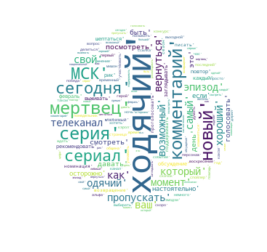

In [26]:
lemmat = dict(lemmat)
lemmat = {l : lemmat[l] for l in lemmat if lemmat[l] > 2 and len(l) > 2}

# сортируем словарь по значениям
sorted(lemmat.items(), key=lambda x: x[1], reverse=True)

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(str(sorted(lemmat.items(), key=lambda x: x[1], reverse=True)))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [27]:
# отсортируем данные по названиям городов
lemmat_nums = [l[1] for l in sorted(lemmat.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
lemmat_labs = sorted([lem for lem in lemmat]) # подписи по оси x
x = range(len(lemmat_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
#colors = sns.color_palette('viridis', max(lemmat_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
#f = interp1d(x, [x+0.5 for x in lemmat_nums], kind='quadratic')
#x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
#y_smooth = f(x_new)


#plt.figure(figsize=(20, 10), dpi=200)
#plt.bar(x, lemmat_nums, color=colors)
#plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
#for a, b in zip(x, lemmat_nums):
#    if b > 5:
#        plt.scatter(a, b+1.5, s=0)
#        plt.text(a-0.3, b+1.5, str(b))


#plt.title('\nЧастотность слов\n',  fontsize=20)
#plt.ylabel('Частотность\n',  fontsize=16)
#plt.xlabel('\nСлово',  fontsize=18)
#plt.xticks(x, lemmat_labs, rotation=90)
#plt.show()

In [28]:
import matplotlib
import matplotlib.cm as cm

# переведем абсолютные значения в проценты (просто так :)
total = sum(lemmat_nums)
lemmat_percent = [num/total*100 for num in lemmat_nums]

norm = matplotlib.colors.Normalize(vmin=min(x), vmax=max(x)//10, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='PuBuGn')

colors = [mapper.to_rgba(v) for v in lemmat_percent]

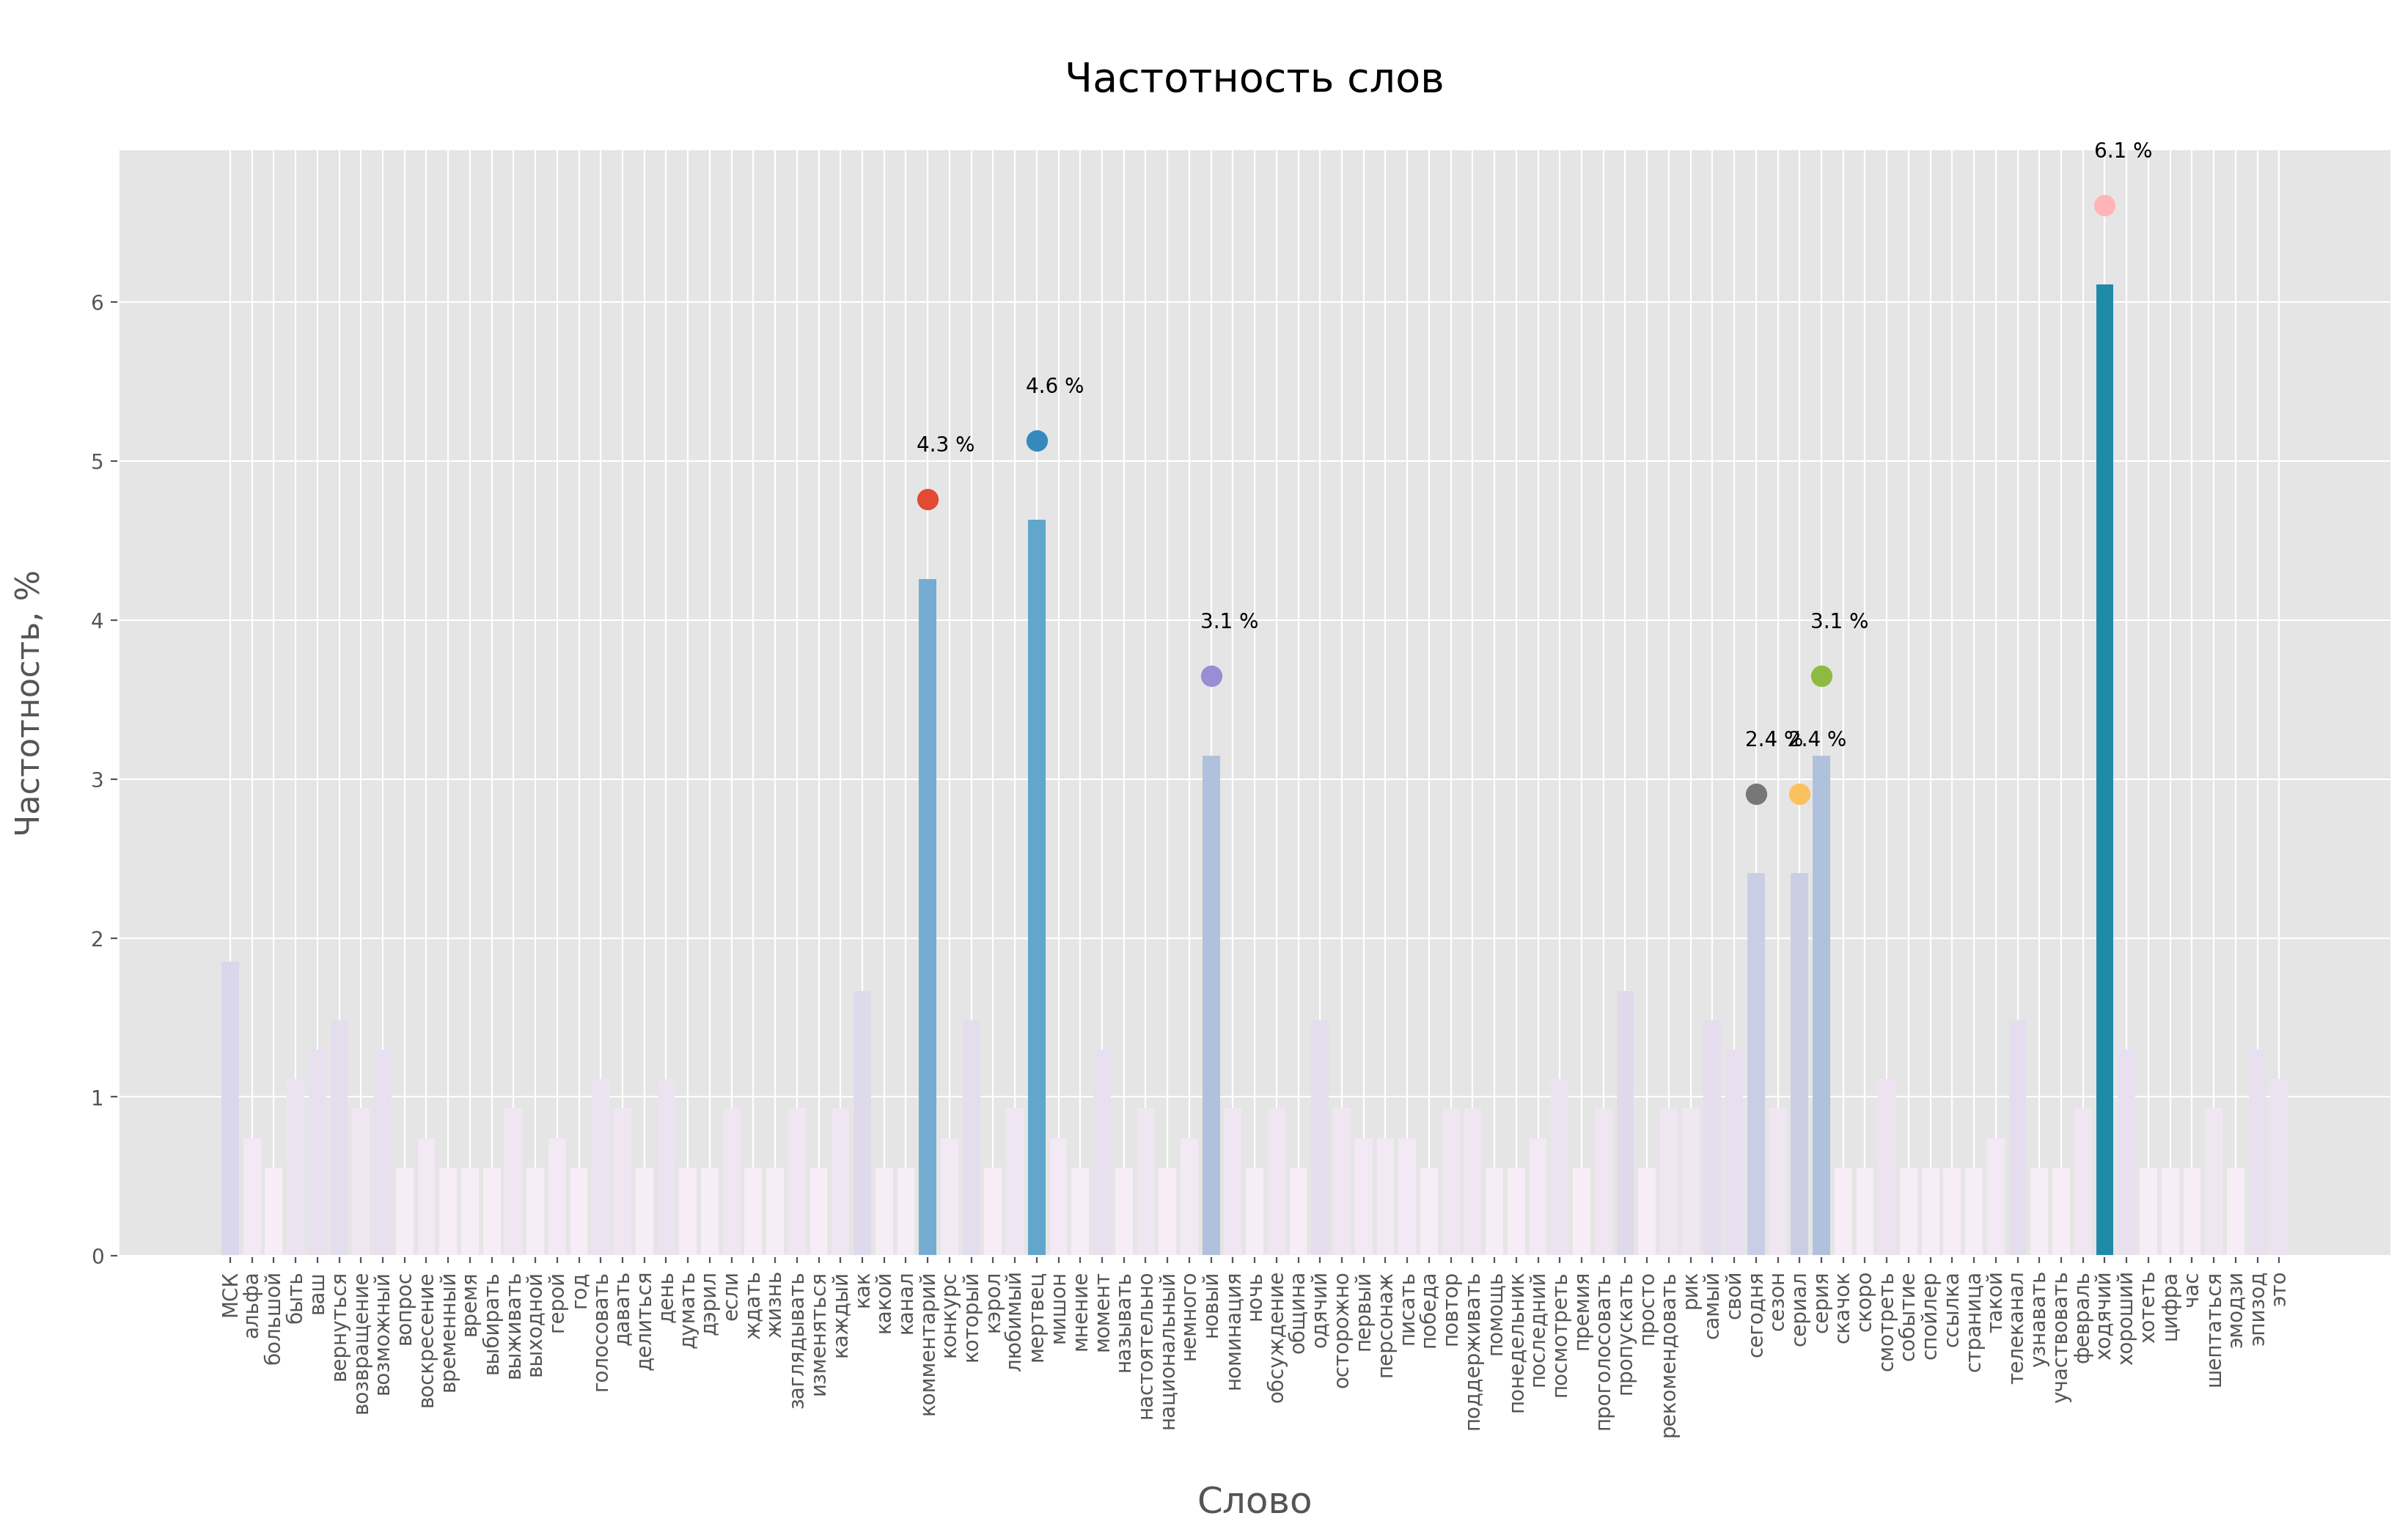

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, lemmat_percent, color=colors)

# рисуем точки максимумов (условных)
for a, b in zip(x, lemmat_percent):
    if b > 2:
        plt.scatter(a, b+0.5, s=100)
        plt.text(a-0.5, b+0.8, '%.1f %%' % (b))


plt.title('\nЧастотность слов\n',  fontsize=20)
plt.ylabel('Частотность, %\n',  fontsize=16)
plt.xlabel('\nСлово',  fontsize=18)
plt.xticks(x, lemmat_labs, rotation=90)
plt.show()
plt.savefig('sample.pdf')

In [31]:
unlemmat = open('lem4.txt','r',encoding='utf-8-sig')
unlemmat = unlemmat.read()
unlemmat = unlemmat.split()
#print(lemmat)

unlemmat = Counter(unlemmat)
print(unlemmat)


Counter({'в': 82, 'на': 48, 'и': 34, 'Ходячих': 27, 'с': 23, 'не': 19, 'что': 18, 'мертвецов': 16, 'вы': 15, 'В': 12, 'сегодня': 12, 'как': 12, 'МСК': 10, 'комментариях': 10, 'Ходячие': 10, 'за': 10, 'Как': 9, 'мертвецы': 9, 'о': 8, 'ОСТОРОЖНО': 7, 'КОММЕНТАРИЯХ': 7, 'ВОЗМОЖНЫ': 7, 'серии': 7, 'всех': 7, 'по': 6, 'новый': 6, 'эпизод': 6, 'посмотреть': 6, 'вас': 6, 'у': 6, 'к': 6, 'серия': 6, 'больше': 6, 'вернутся': 6, 'будет': 5, 'все': 5, 'Если': 5, 'пропустили': 5, 'настоятельно': 5, 'рекомендуем': 5, 'заглядывать': 5, 'комментарии': 5, 'повтор': 5, 'это': 5, 'обсуждение': 5, 'мы': 5, 'любимый': 5, 'вам': 5, 'номинации': 5, 'можно': 5, 'после': 4, 'воскресенье': 4, 'этот': 4, 'день': 4, 'Мишон': 4, 'ваш': 4, 'Новая': 4, 'февраля': 4, 'так': 4, 'момент': 4, 'Телеканал': 4, 'сериалов': 4, 'Не': 4, 'то': 3, 'Давайте': 3, 'серию': 3, 'со': 3, 'Пишите': 3, 'ночью': 3, 'только': 3, 'Смотрите': 3, 'Кэрол': 3, 'И': 3, 'Участвуйте': 3, 'конкурсе': 3, 'странице': 3, 'его': 3, 'будут': 3, 'ско

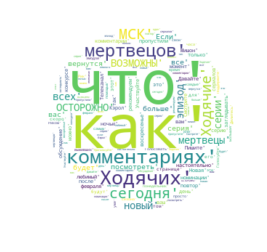

In [32]:
unlemmat = dict(unlemmat)
unlemmat = {u : unlemmat[u] for u in unlemmat if unlemmat[u] > 2 and len(u) > 2}

# сортируем словарь по значениям
sorted(unlemmat.items(), key=lambda x: x[1], reverse=True)

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(str(sorted(unlemmat.items(), key=lambda x: x[1], reverse=True)))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [33]:
# отсортируем данные по названиям городов
unlemmat_nums = [u[1] for u in sorted(unlemmat.items(), key=lambda x: x[0], reverse=False)] # данные по оси y
unlemmat_labs = sorted([unlem for unlem in unlemmat]) # подписи по оси x
x = range(len(unlemmat_labs)) # данные по оси x

# задаем палитру (цвета ничего не будут значить)
#colors = sns.color_palette('viridis', max(unlemmat_nums)) 

# кривая со сглаживанием поверх барплота (необязательно)
#f = interp1d(x, [x+0.5 for x in unlemmat_nums], kind='quadratic')
#x_new = np.linspace(0, 51, 500) # тут нужны min и max по оси x
#y_smooth = f(x_new)


#plt.figure(figsize=(20, 10), dpi=200)
#plt.bar(x, unlemmat_nums, color=colors)
#plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='3')


# рисуем точки максимумов (условных)
#for a, b in zip(x, unlemmat_nums):
#    if b > 5:
#        plt.scatter(a, b+1.5, s=0)
#        plt.text(a-0.3, b+1.5, str(b))


#plt.title('\nЧастотность слов (без лемматизации)\n',  fontsize=20)
#plt.ylabel('Частотность\n',  fontsize=16)
#plt.xlabel('\nСлово',  fontsize=18)
#plt.xticks(x, unlemmat_labs, rotation=90)
#plt.show()

In [34]:
import matplotlib
import matplotlib.cm as cm

# переведем абсолютные значения в проценты (просто так :)
total = sum(unlemmat_nums)
unlemmat_percent = [num/total*100 for num in unlemmat_nums]

norm = matplotlib.colors.Normalize(vmin=min(x), vmax=max(x)//10, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='PuBuGn')

colors = [mapper.to_rgba(v) for v in unlemmat_percent]

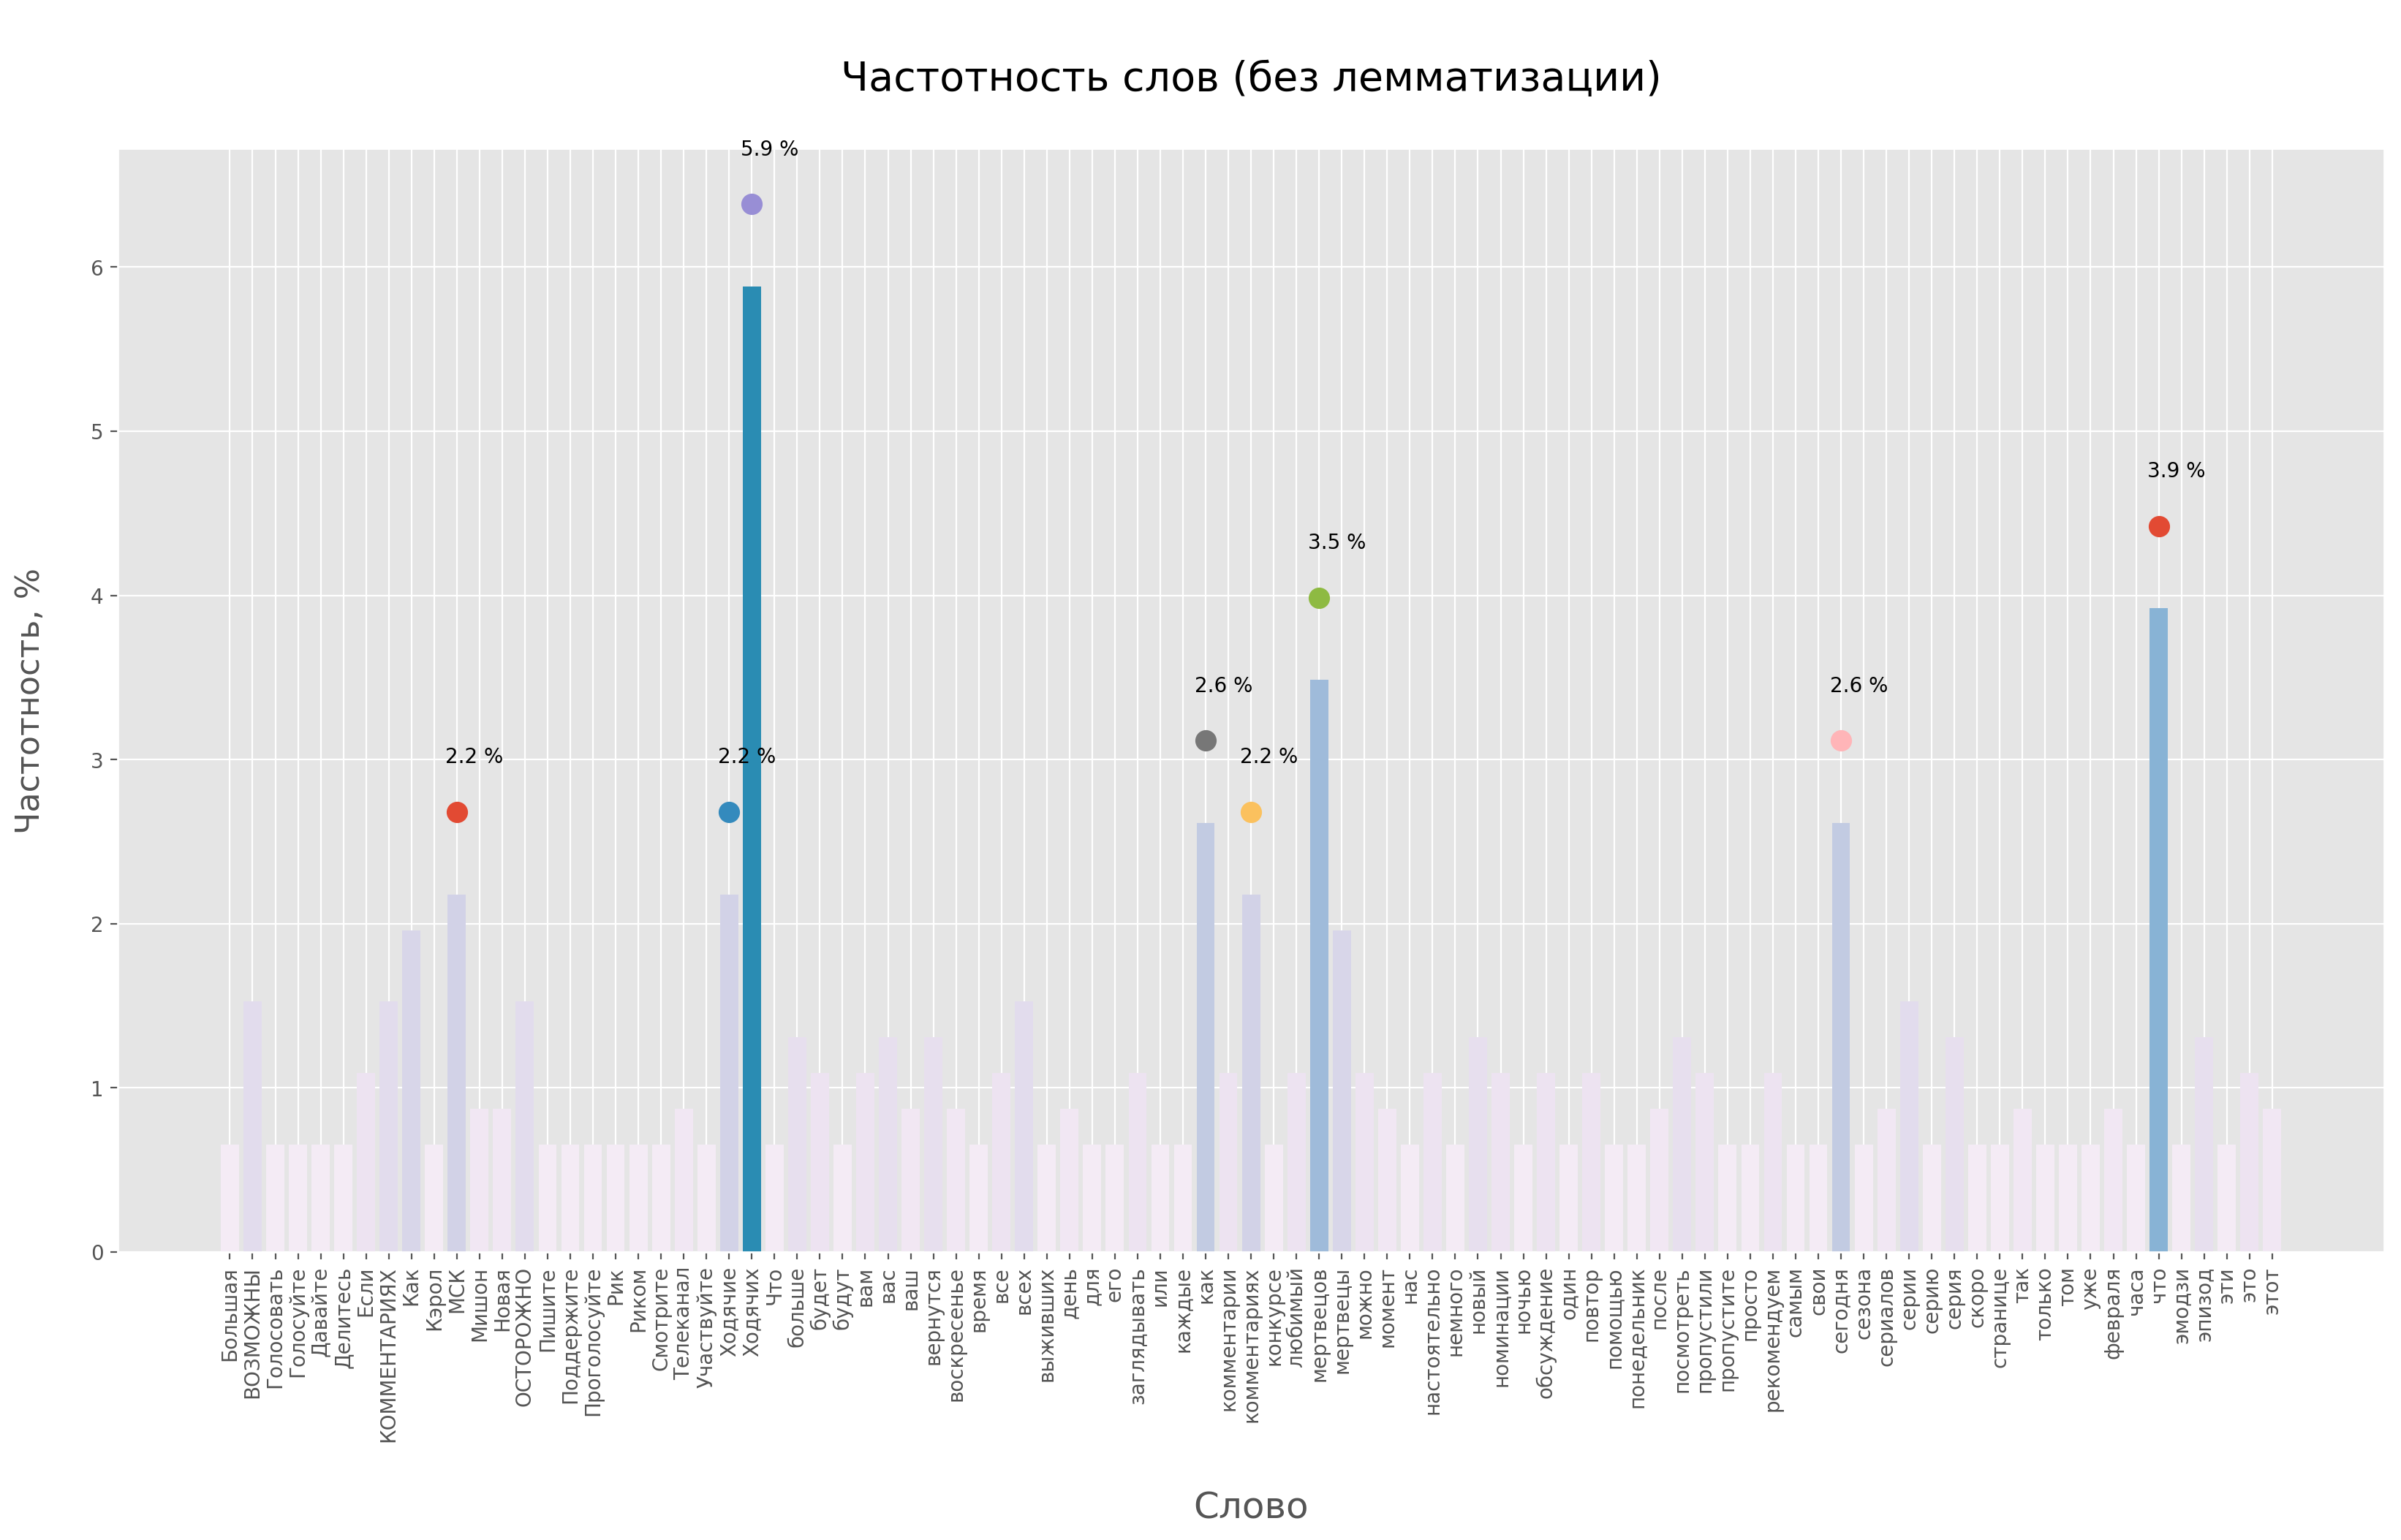

In [35]:
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, unlemmat_percent, color=colors)

# рисуем точки максимумов (условных)
for a, b in zip(x, unlemmat_percent):
    if b > 2:
        plt.scatter(a, b+0.5, s=100)
        plt.text(a-0.5, b+0.8, '%.1f %%' % (b))


plt.title('\nЧастотность слов (без лемматизации)\n',  fontsize=20)
plt.ylabel('Частотность, %\n',  fontsize=16)
plt.xlabel('\nСлово',  fontsize=18)
plt.xticks(x, unlemmat_labs, rotation=90)
plt.show()
#plt.savefig('sample.pdf')

In [ ]:
print(users)

In [76]:
#i = 0
#for user in users:
#    if i > 1000:
#        break
#    req = urllib.request.Request('https://api.vk.com/method/users.get?v=5.92&access_token=e5ece68ee5ece68ee5ece68ea6e5850abfee5ece5ece68eb95c63f90f3813e53ece6d9b&user_ids=%s'  % (user))
#    response = urllib.request.urlopen(req) 
#    result = response.read().decode('utf-8')
#    data = json.loads(result) 
    #if 'id' not in (data['response'][0]):
    #    ids.append('unknown')
    #else:
    #    ids.append(data['response'][0]['id'])
#    print(data['response'][0]['id'])

1490944
1892353
1925121
2703362
442372
565256
221196
3448846
761871
794640
245777
647186
1318928
1523728
1081365
1884178
1359895
2252820
3063832
3080220
1785885
1851421
2498601


KeyboardInterrupt: 

In [114]:
#import csv, sqlite3

#con = sqlite3.connect("file.db")
#cur = con.cursor()
#cur.execute('DROP TABLE IF EXISTS t')
#cur.execute("CREATE TABLE t (First_name, Last_name, Sex, Birthday, Home_town, Id);") # use your column names here

#with open('user_information45.csv','rt',encoding='utf-8') as fin: # `with` statement available in 2.5+
#    i = 0
    # csv.DictReader uses first line in file for column headings by default
#    for user in users:
#        dr = csv.DictReader(fin) # comma is default delimiter
#        to_db = [(data['response'][0]['first_name'], data['response'][0]['last_name'], '','','','') for i in dr]#, data['response'][0]['sex'], data['response'][0]['bdate'], data['response'][0]['home_town'], data['response'][0]['id']) for i in dr]
#        i += 1
#        if i > 1000:
#            break
#cur.executemany("INSERT INTO t (First_name, Last_name, Sex, Birthday, Home_town, Id) VALUES (?, ?, ?, ?, ?, ?);", to_db)
#con.commit()
#con.close()

TypeError: list indices must be integers or slices, not collections.OrderedDict

In [116]:
#! pip install csvkit

  Using cached https://files.pythonhosted.org/packages/92/77/ef675f16486884ff7f77f3cb87aafa3429c6bb869d4d73ee23bf4675e384/agate-1.6.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9f/b36f7774ff5ea8e428fdcfc4bb332c39ee5b9362ddd3d40d9516a55221b2/isodate-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/b4/afd75551a3b910abd1d922dbd45e49e5deeb4d47dc50209ce489ba9844dd/pytimeparse-1.1.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/f4/692a53df6708caca1c6d088c6d9003940f164f98bd9df2bdc86233641e9c/leather-0.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/94/51349e43503e30ed7b4ecfe68a8809cdb58f722c0feb79d18b1f1e36fe74/dbfread-2.0.7-py2.py3-none-any.whl
  Stored in directory: C:\Users\ARTEM\AppData\Local\pip\Cache\wheels\5f\be\3f\d151aff6c6cce1aa1d56233d68c4b9d38b045bbe5fda018d45
  Stored in directory: C:\Users\ARTEM\AppData\Local\pip\Cache\wheels\8a\2f\99\dbf1c6af14